## Importing Relevent Libraries

In [64]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import accuracy_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()
sns.set(style = 'whitegrid',palette = 'muted',font_scale = 1.5)

rcParams['figure.figsize'] = 22,10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [36]:
df = pd.read_csv(r'D:\Data Science Project\7- London Bike Sharing\bike_sharing_data_london.csv',parse_dates = ['timestamp'],index_col = 'timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [37]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

## Creating Columns for Hour,Month,Day of week,Day of Month

In [38]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


## Plotting Different Plots(Hours,Months etc With Share Counts)

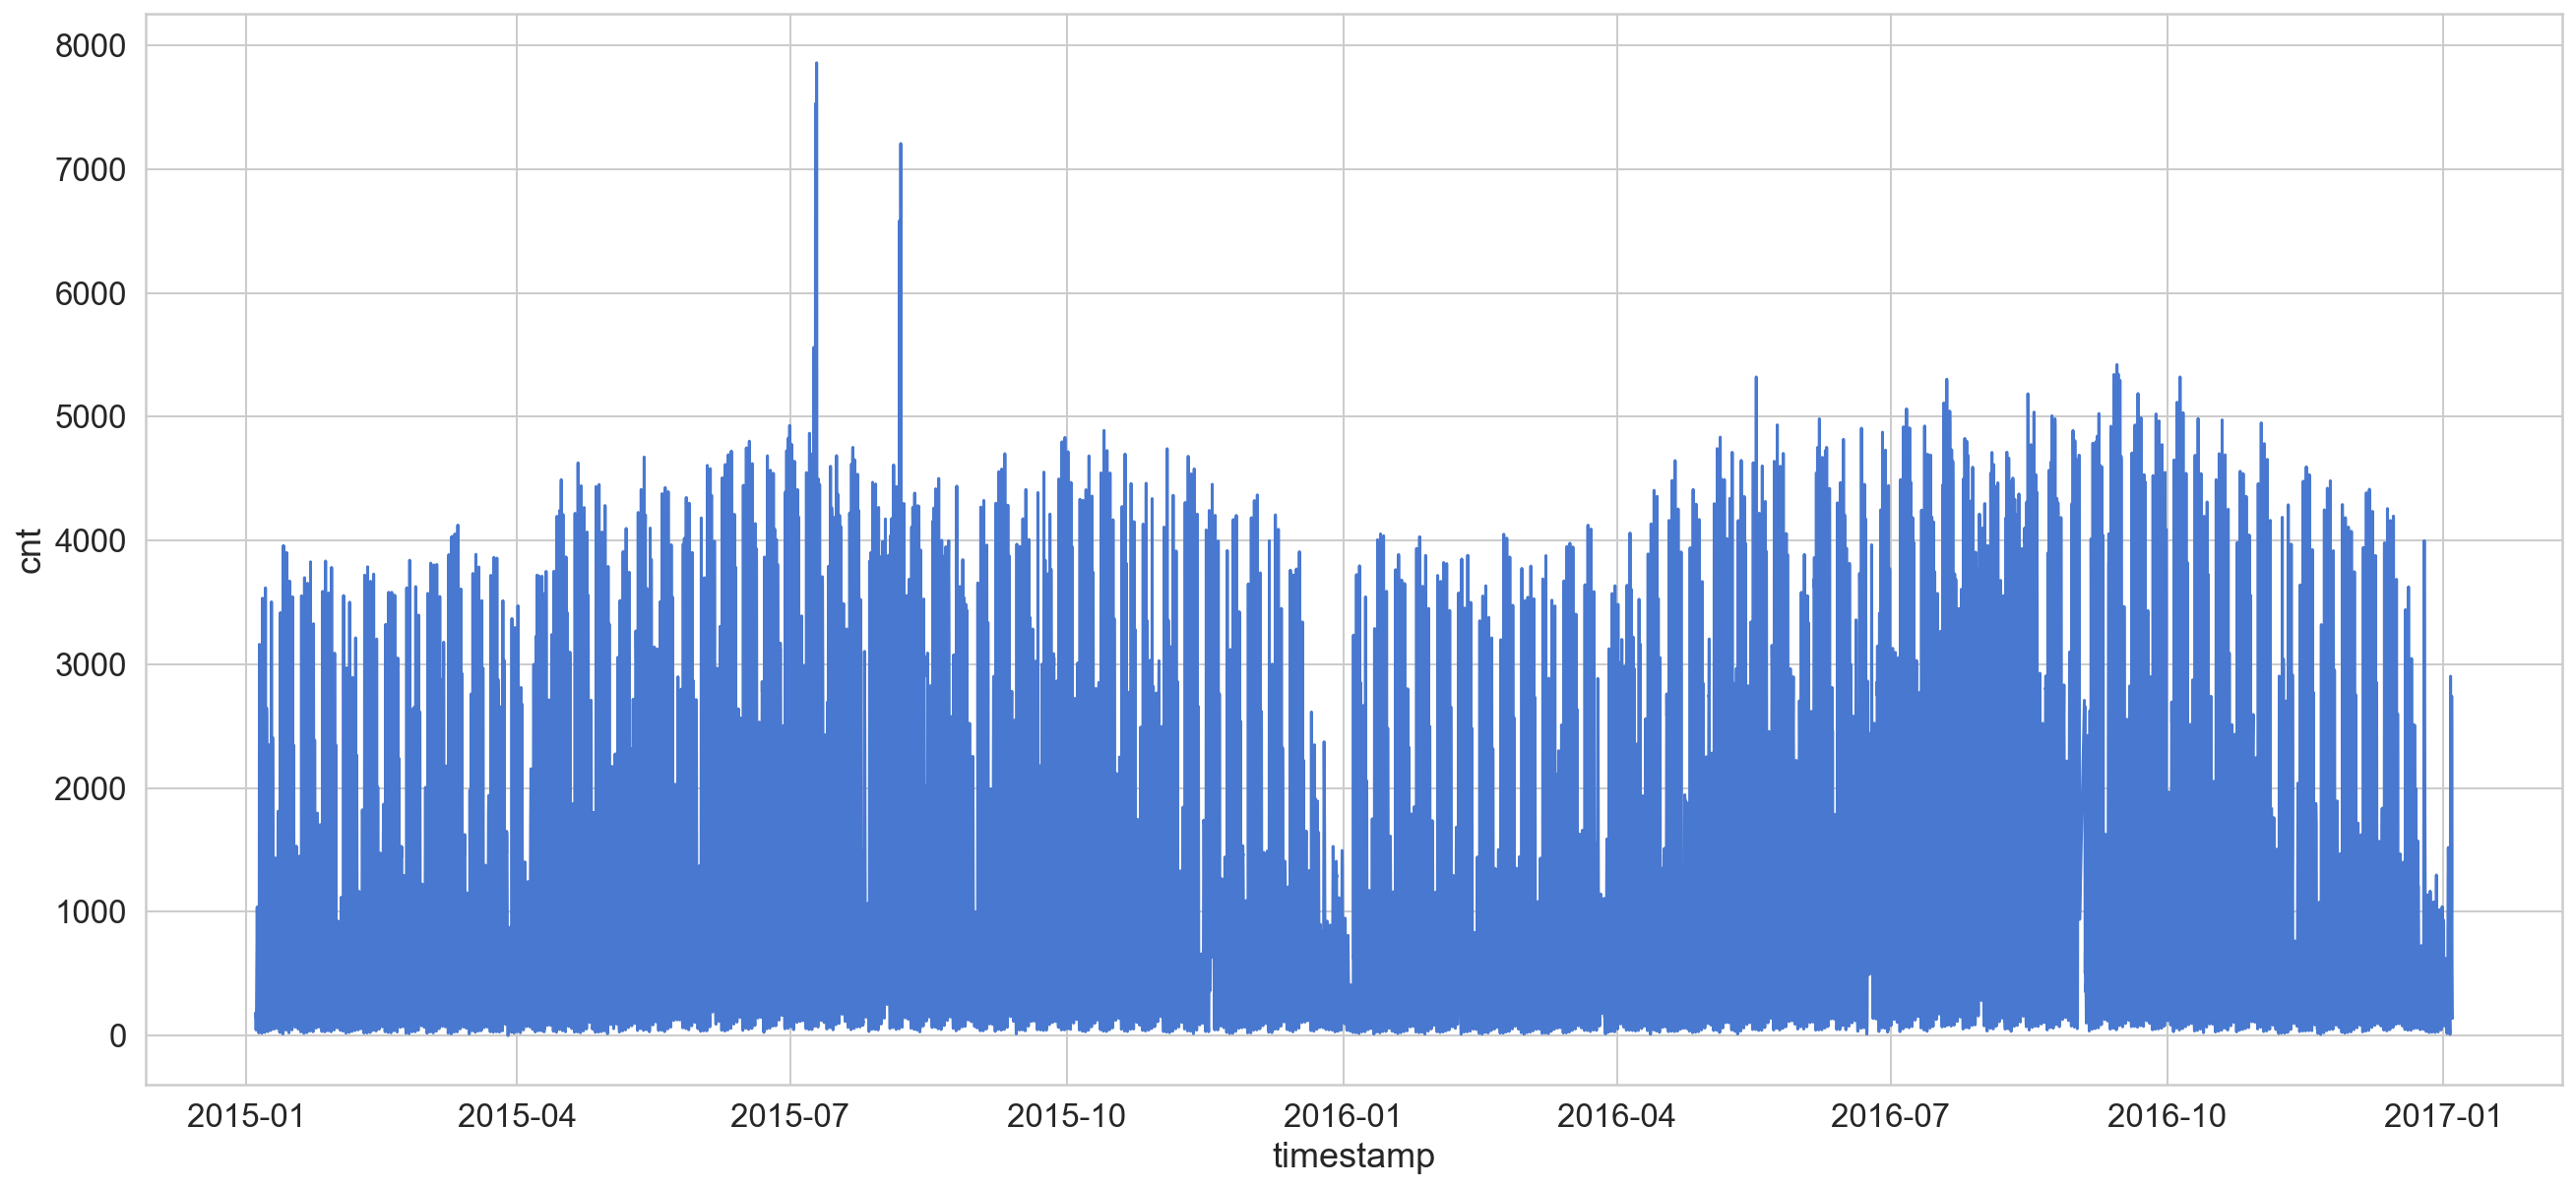

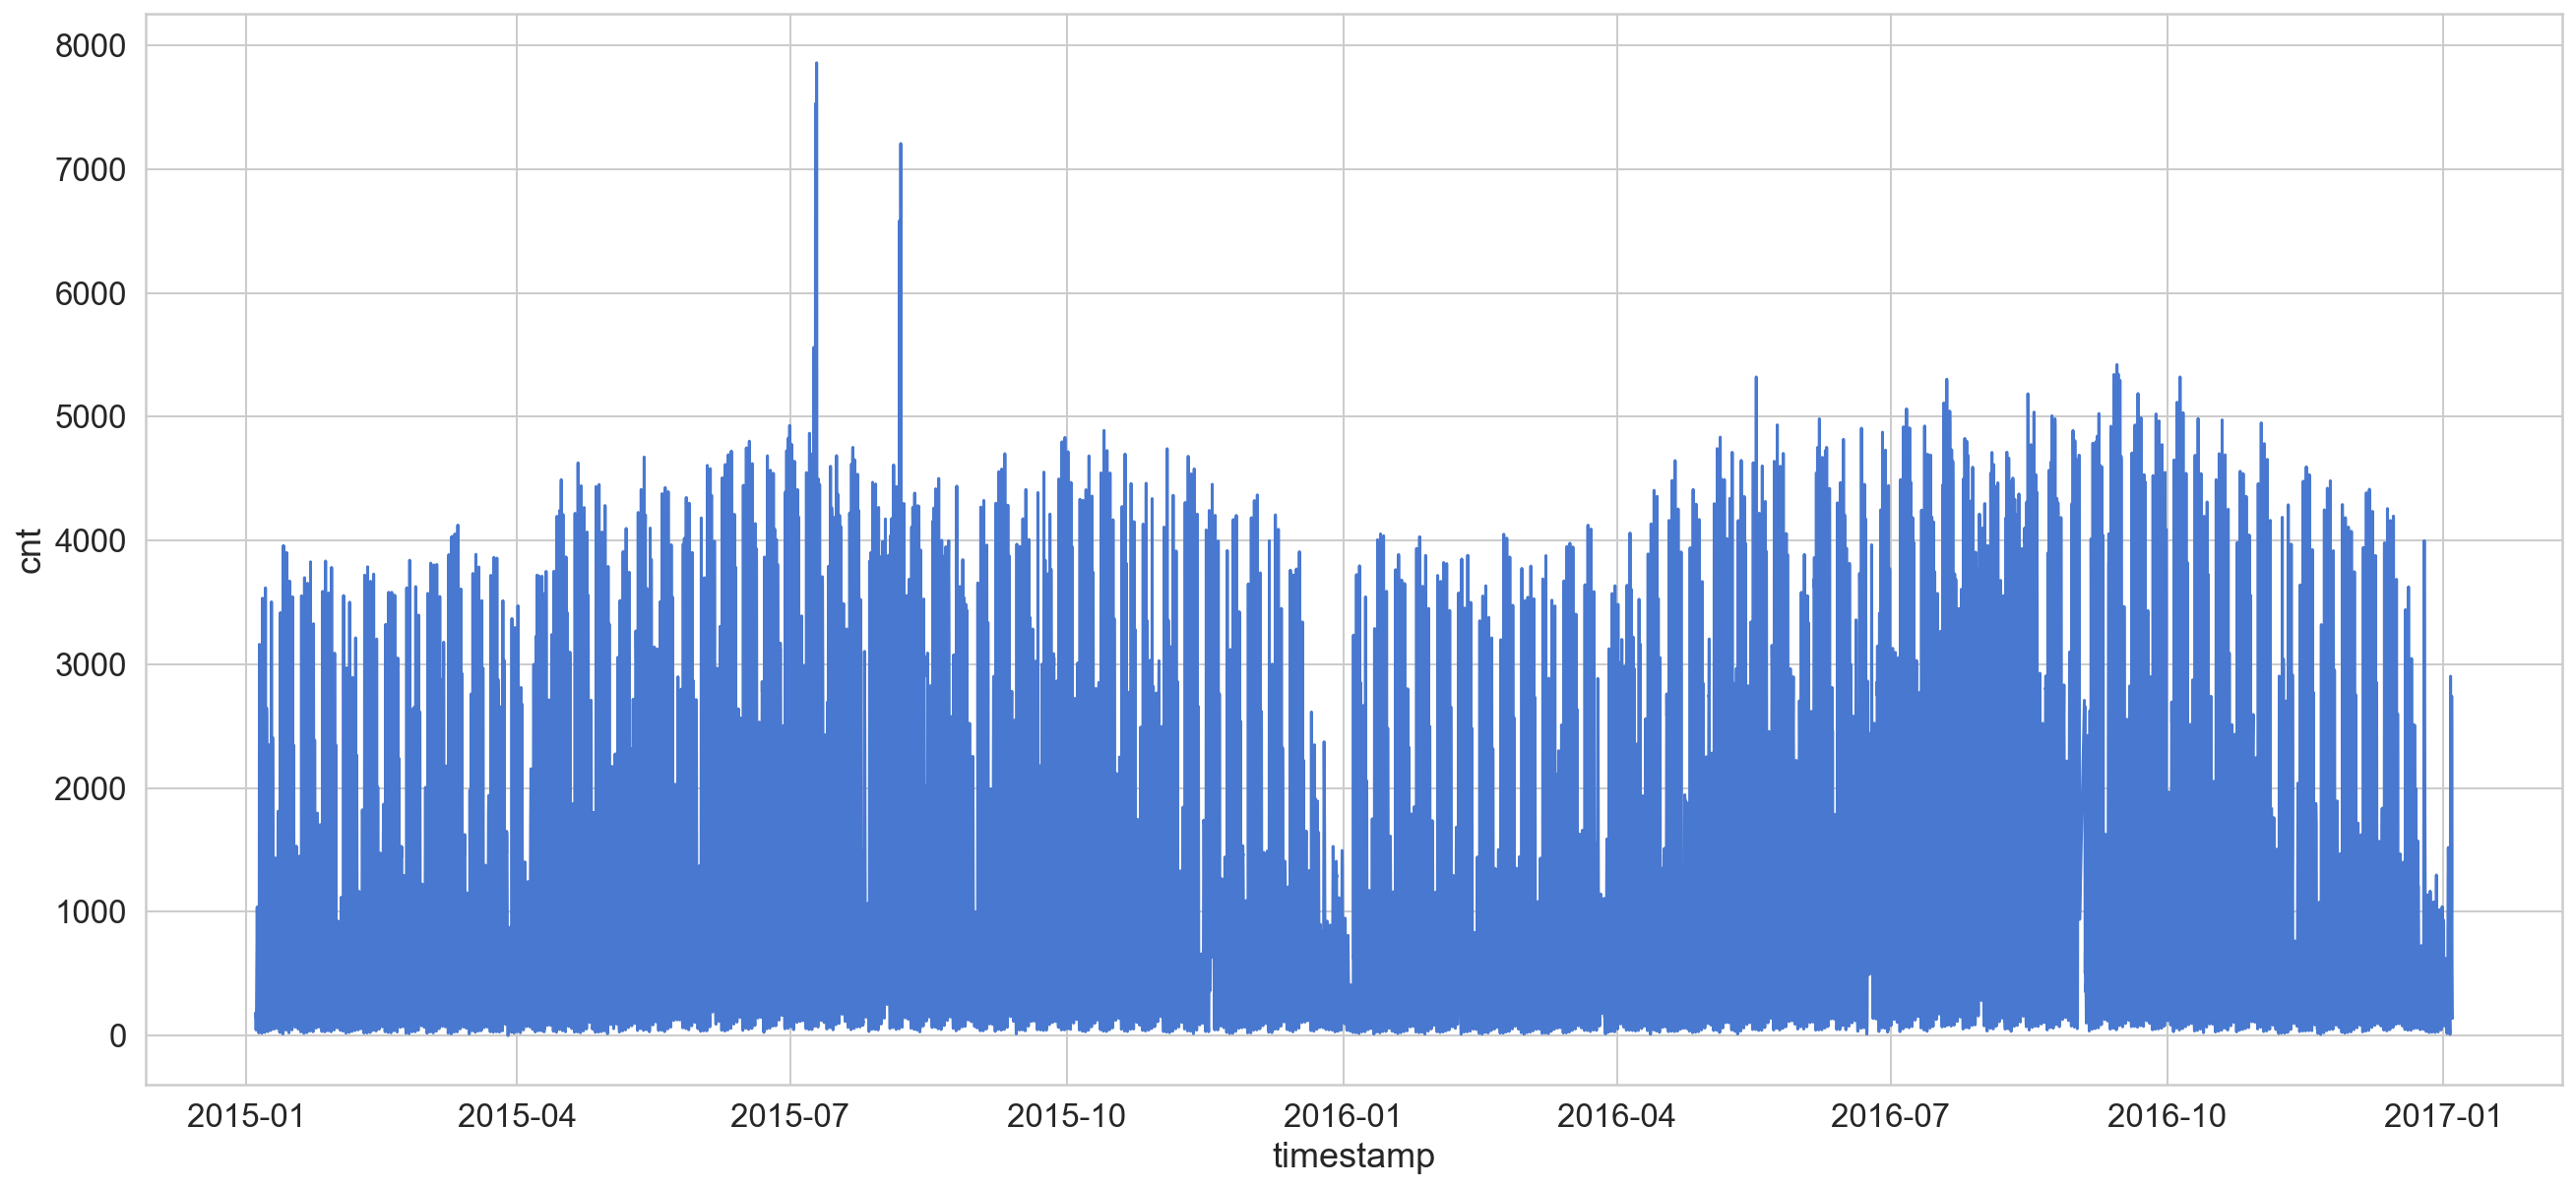

In [39]:
sns.lineplot(x = df.index, y = 'cnt',data = df);

In [40]:
df_by_month = df.resample('M').sum()
df_by_month

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-31,546639,4101.000000,2255.500000,51005.00,12502.000000,2211.0,0.0,192.0,2013.0,7709,2014,11753,671
2015-02-28,543594,3721.500000,1868.000000,51950.00,9873.500000,2409.0,0.0,192.0,2013.0,7707,2015,9734,1342
2015-03-31,695934,6093.500000,4558.500000,51832.25,12938.250000,1940.0,0.0,215.0,0.0,8540,2174,11751,2217
2015-04-30,831582,7873.000000,7112.500000,48468.00,10988.500000,1642.0,48.0,191.0,0.0,8270,2131,11156,2876
2015-05-31,895413,10091.500000,9803.500000,47939.00,14268.500000,1900.0,48.0,240.0,0.0,8556,2376,11904,3720
2015-06-30,1033252,12151.500000,12073.000000,44371.50,12398.000000,1457.0,0.0,192.0,717.0,8268,2028,11145,4302
2015-07-31,1120687,14107.000000,14060.000000,46632.50,13067.000000,1710.0,0.0,192.0,740.0,8508,2232,11831,5180
2015-08-31,1033951,13830.500000,13816.500000,51913.50,10326.000000,1948.0,24.0,240.0,744.0,8556,2280,11904,5952
2015-09-30,892478,10371.000000,10357.500000,52002.00,9394.000000,1683.0,0.0,185.0,1422.0,8210,2045,11047,6399


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-31,546639,4101.000000,2255.500000,51005.00,12502.000000,2211.0,0.0,192.0,2013.0,7709,2014,11753,671
2015-02-28,543594,3721.500000,1868.000000,51950.00,9873.500000,2409.0,0.0,192.0,2013.0,7707,2015,9734,1342
2015-03-31,695934,6093.500000,4558.500000,51832.25,12938.250000,1940.0,0.0,215.0,0.0,8540,2174,11751,2217
2015-04-30,831582,7873.000000,7112.500000,48468.00,10988.500000,1642.0,48.0,191.0,0.0,8270,2131,11156,2876
2015-05-31,895413,10091.500000,9803.500000,47939.00,14268.500000,1900.0,48.0,240.0,0.0,8556,2376,11904,3720
2015-06-30,1033252,12151.500000,12073.000000,44371.50,12398.000000,1457.0,0.0,192.0,717.0,8268,2028,11145,4302
2015-07-31,1120687,14107.000000,14060.000000,46632.50,13067.000000,1710.0,0.0,192.0,740.0,8508,2232,11831,5180
2015-08-31,1033951,13830.500000,13816.500000,51913.50,10326.000000,1948.0,24.0,240.0,744.0,8556,2280,11904,5952
2015-09-30,892478,10371.000000,10357.500000,52002.00,9394.000000,1683.0,0.0,185.0,1422.0,8210,2045,11047,6399


<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

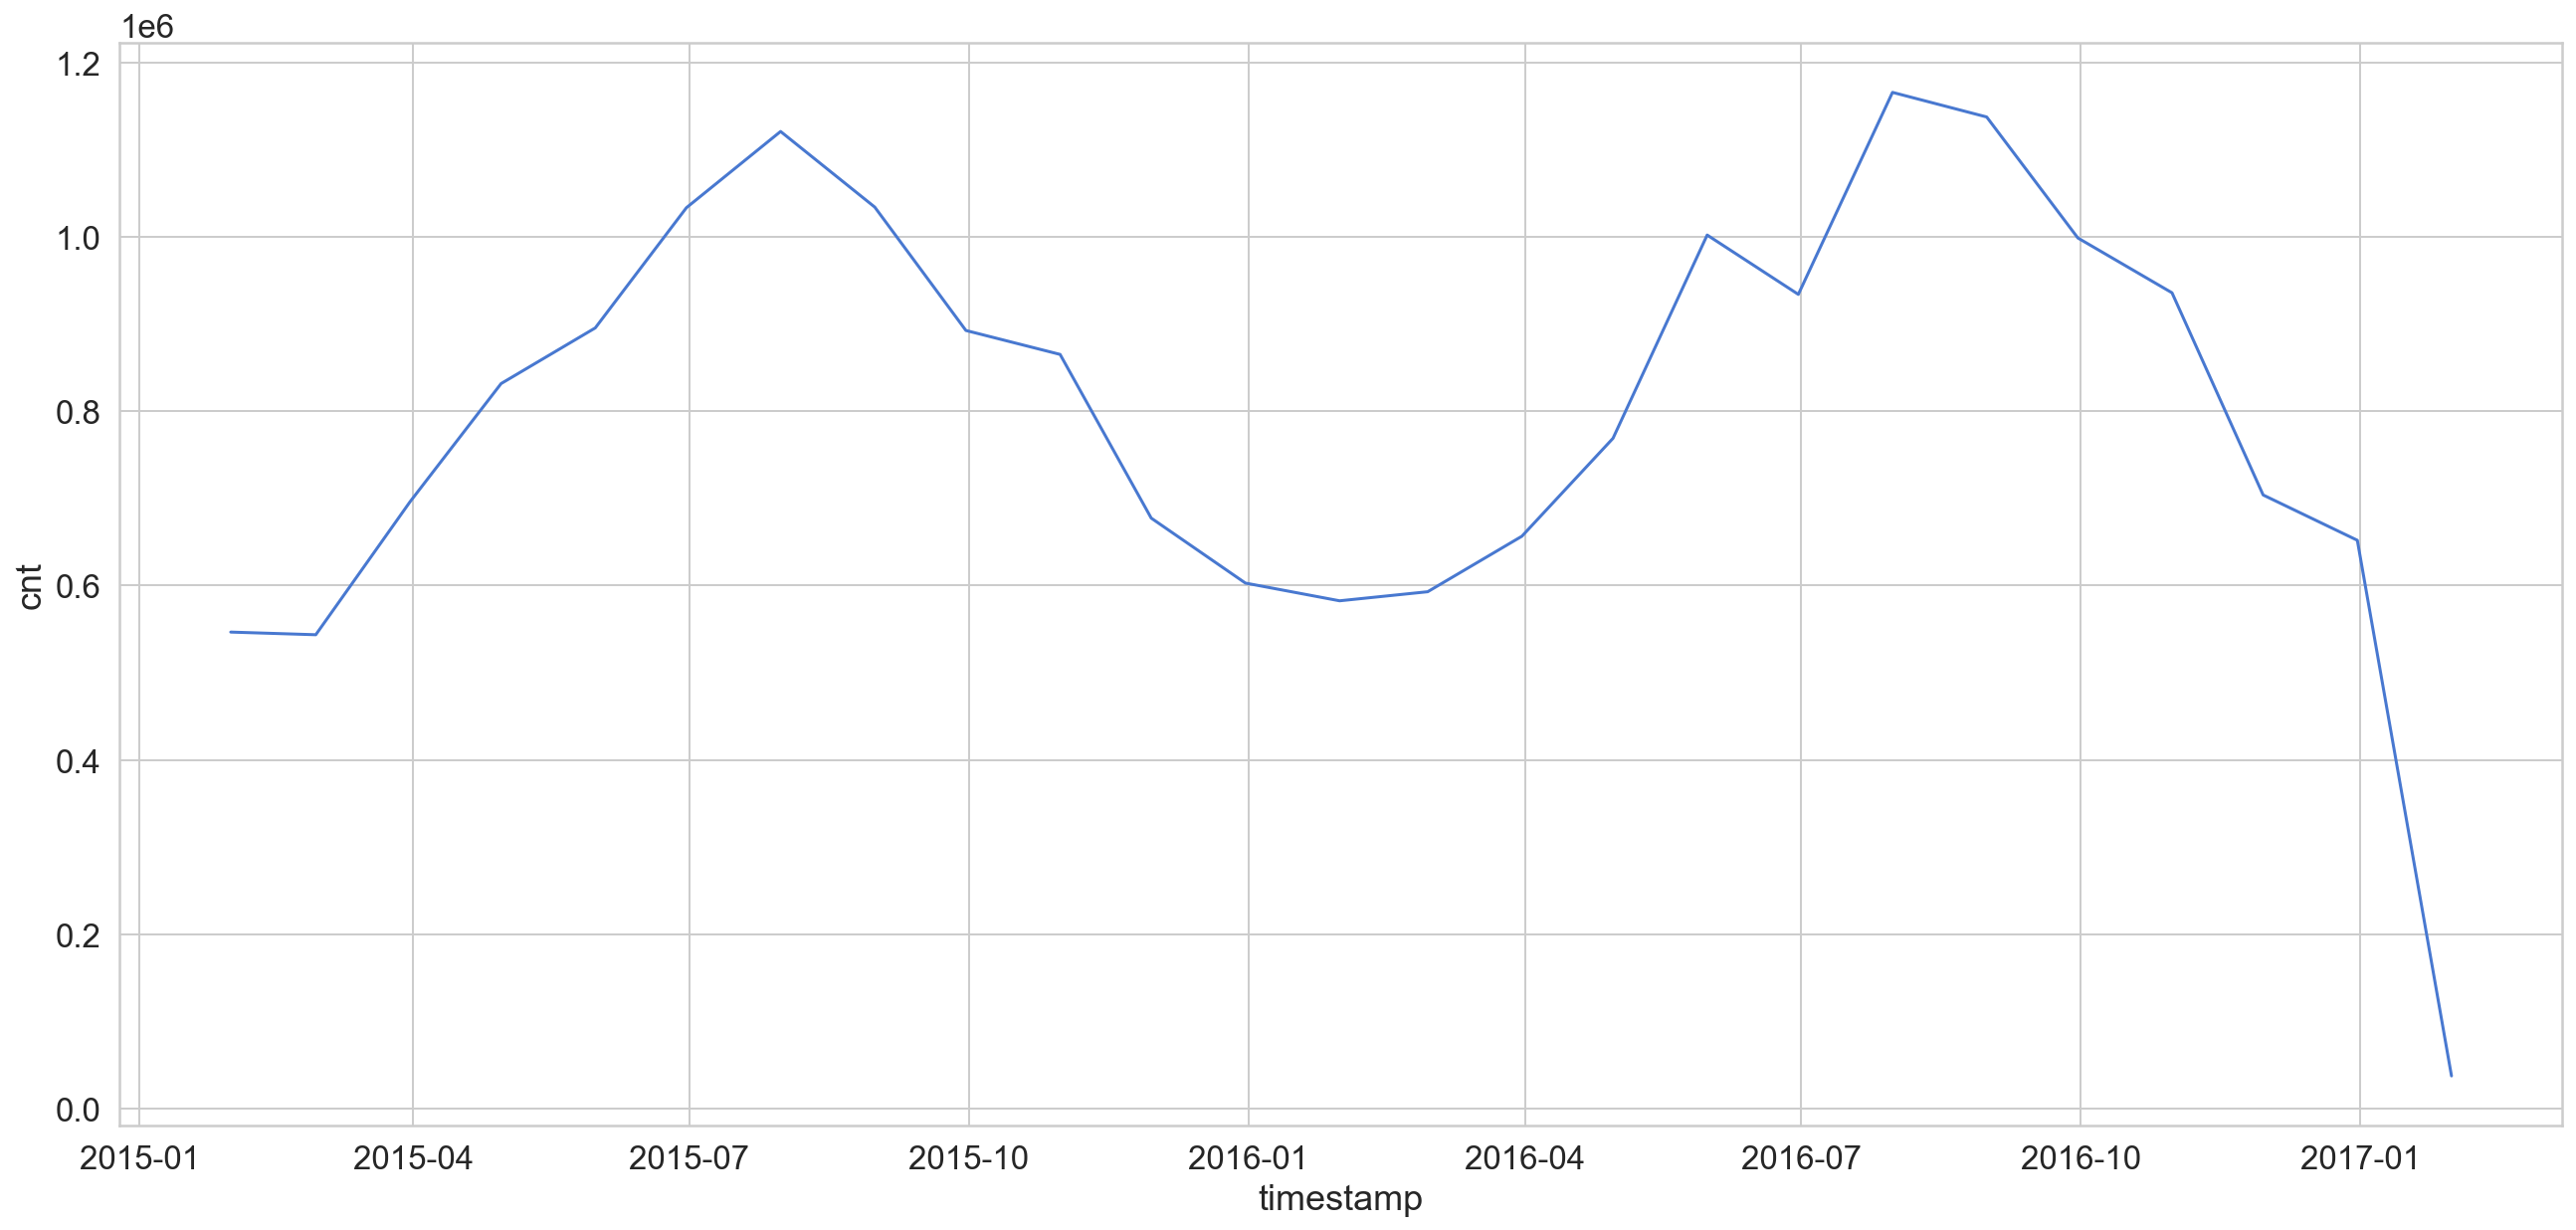

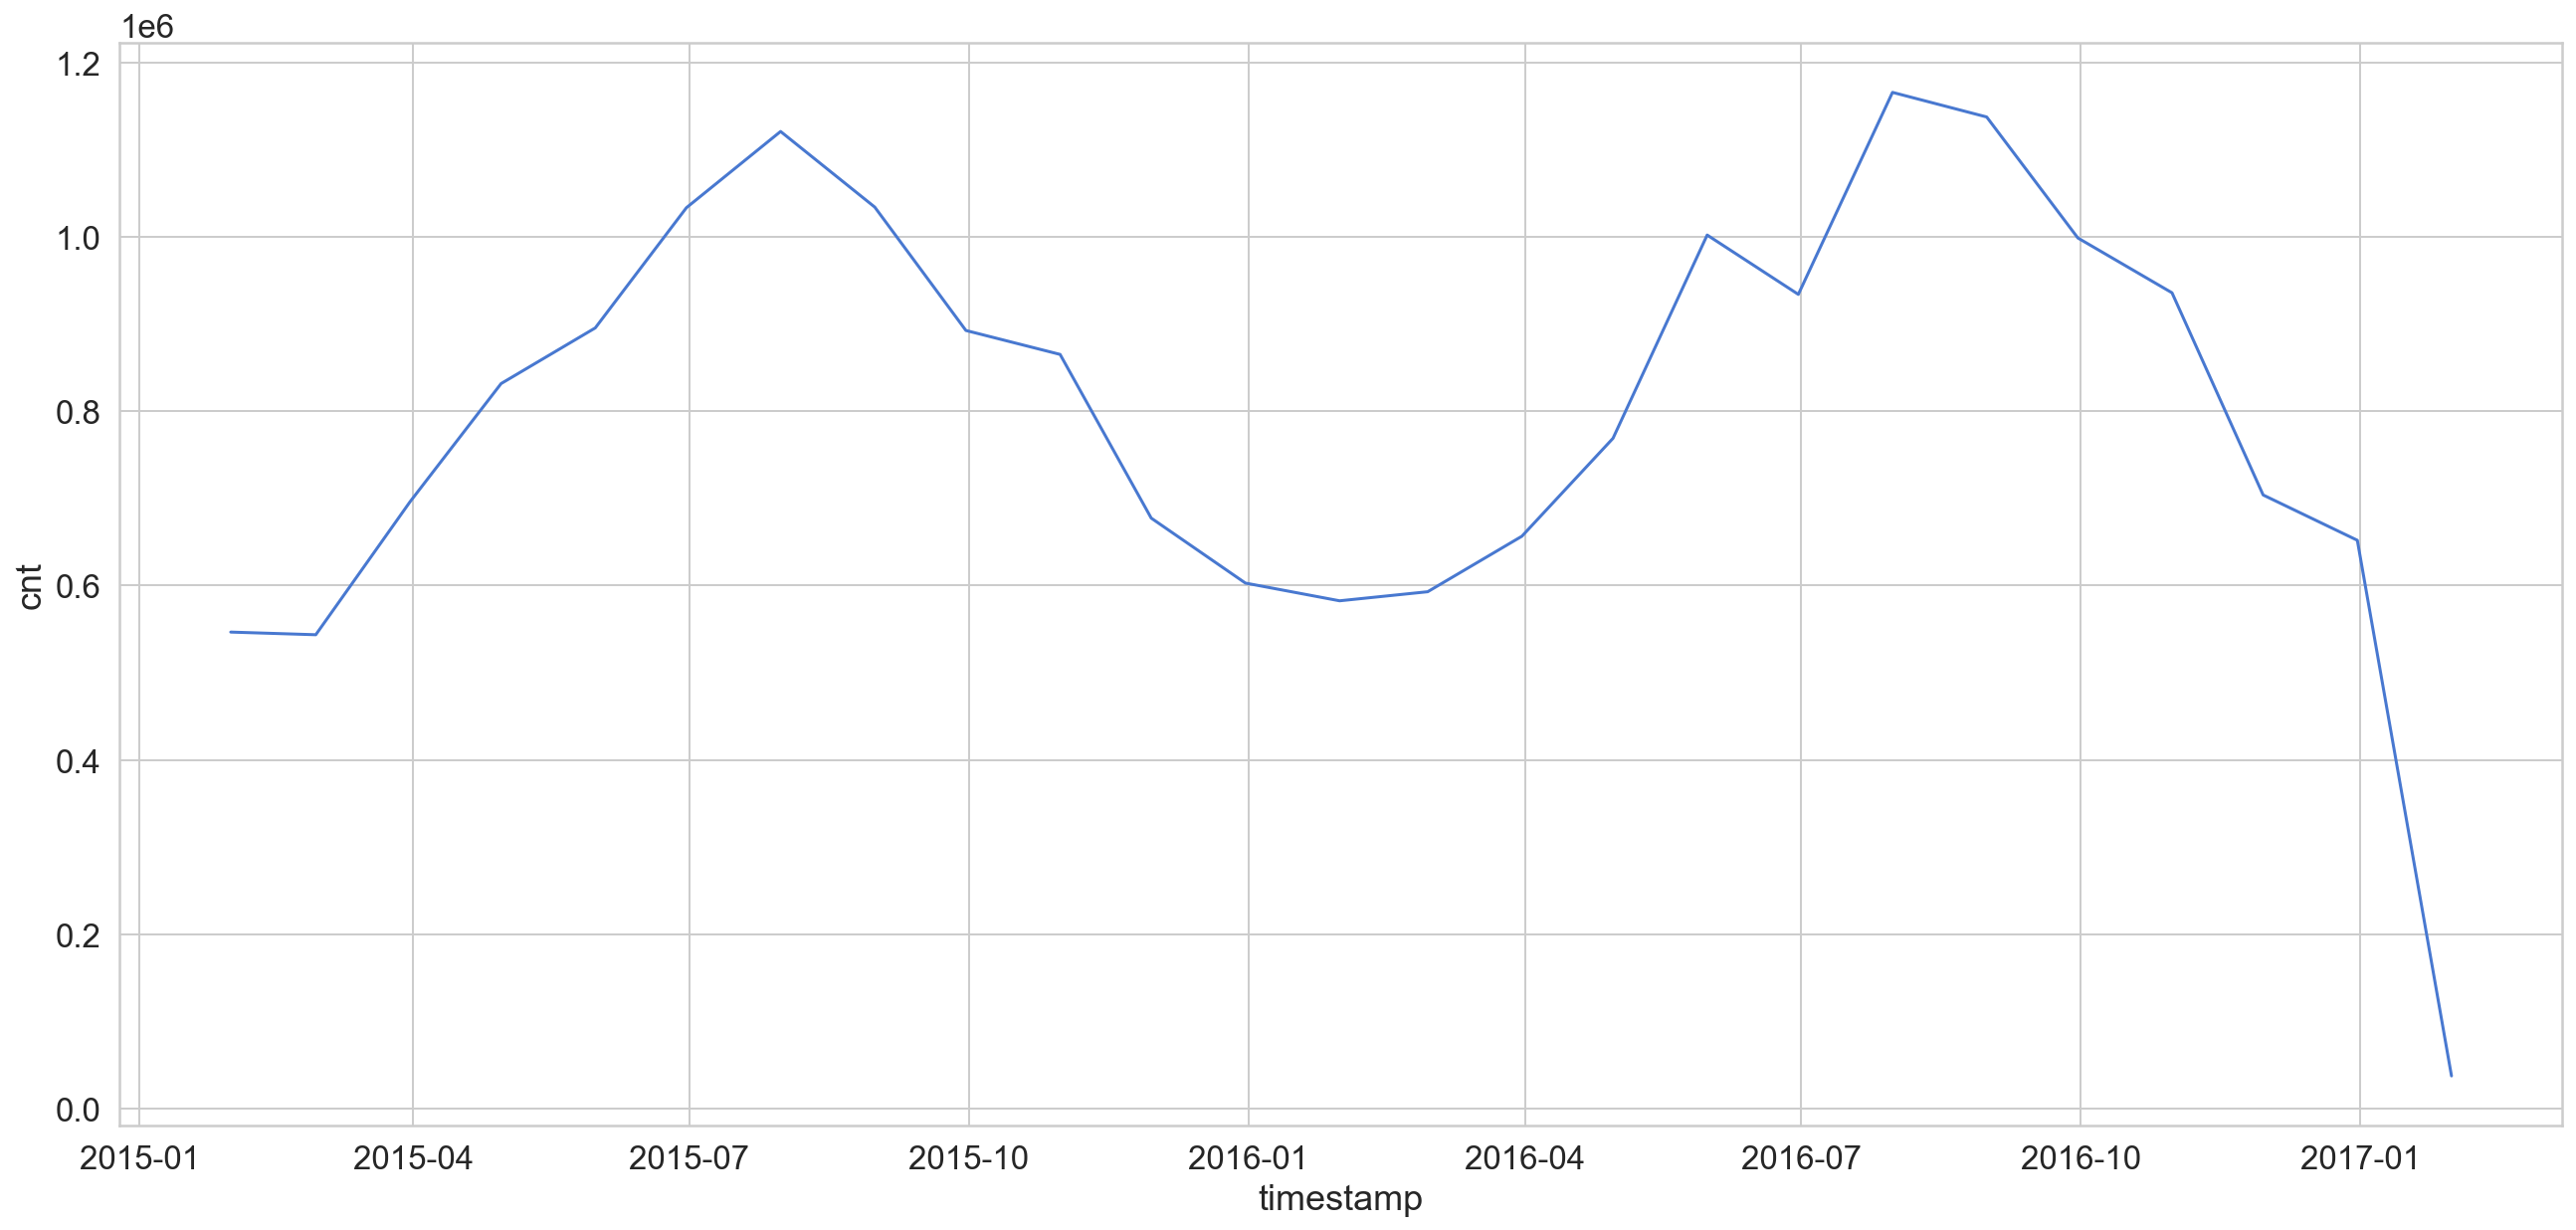

In [41]:
sns.lineplot(x = df_by_month.index,y='cnt',data = df_by_month)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

<AxesSubplot:xlabel='hour', ylabel='cnt'>

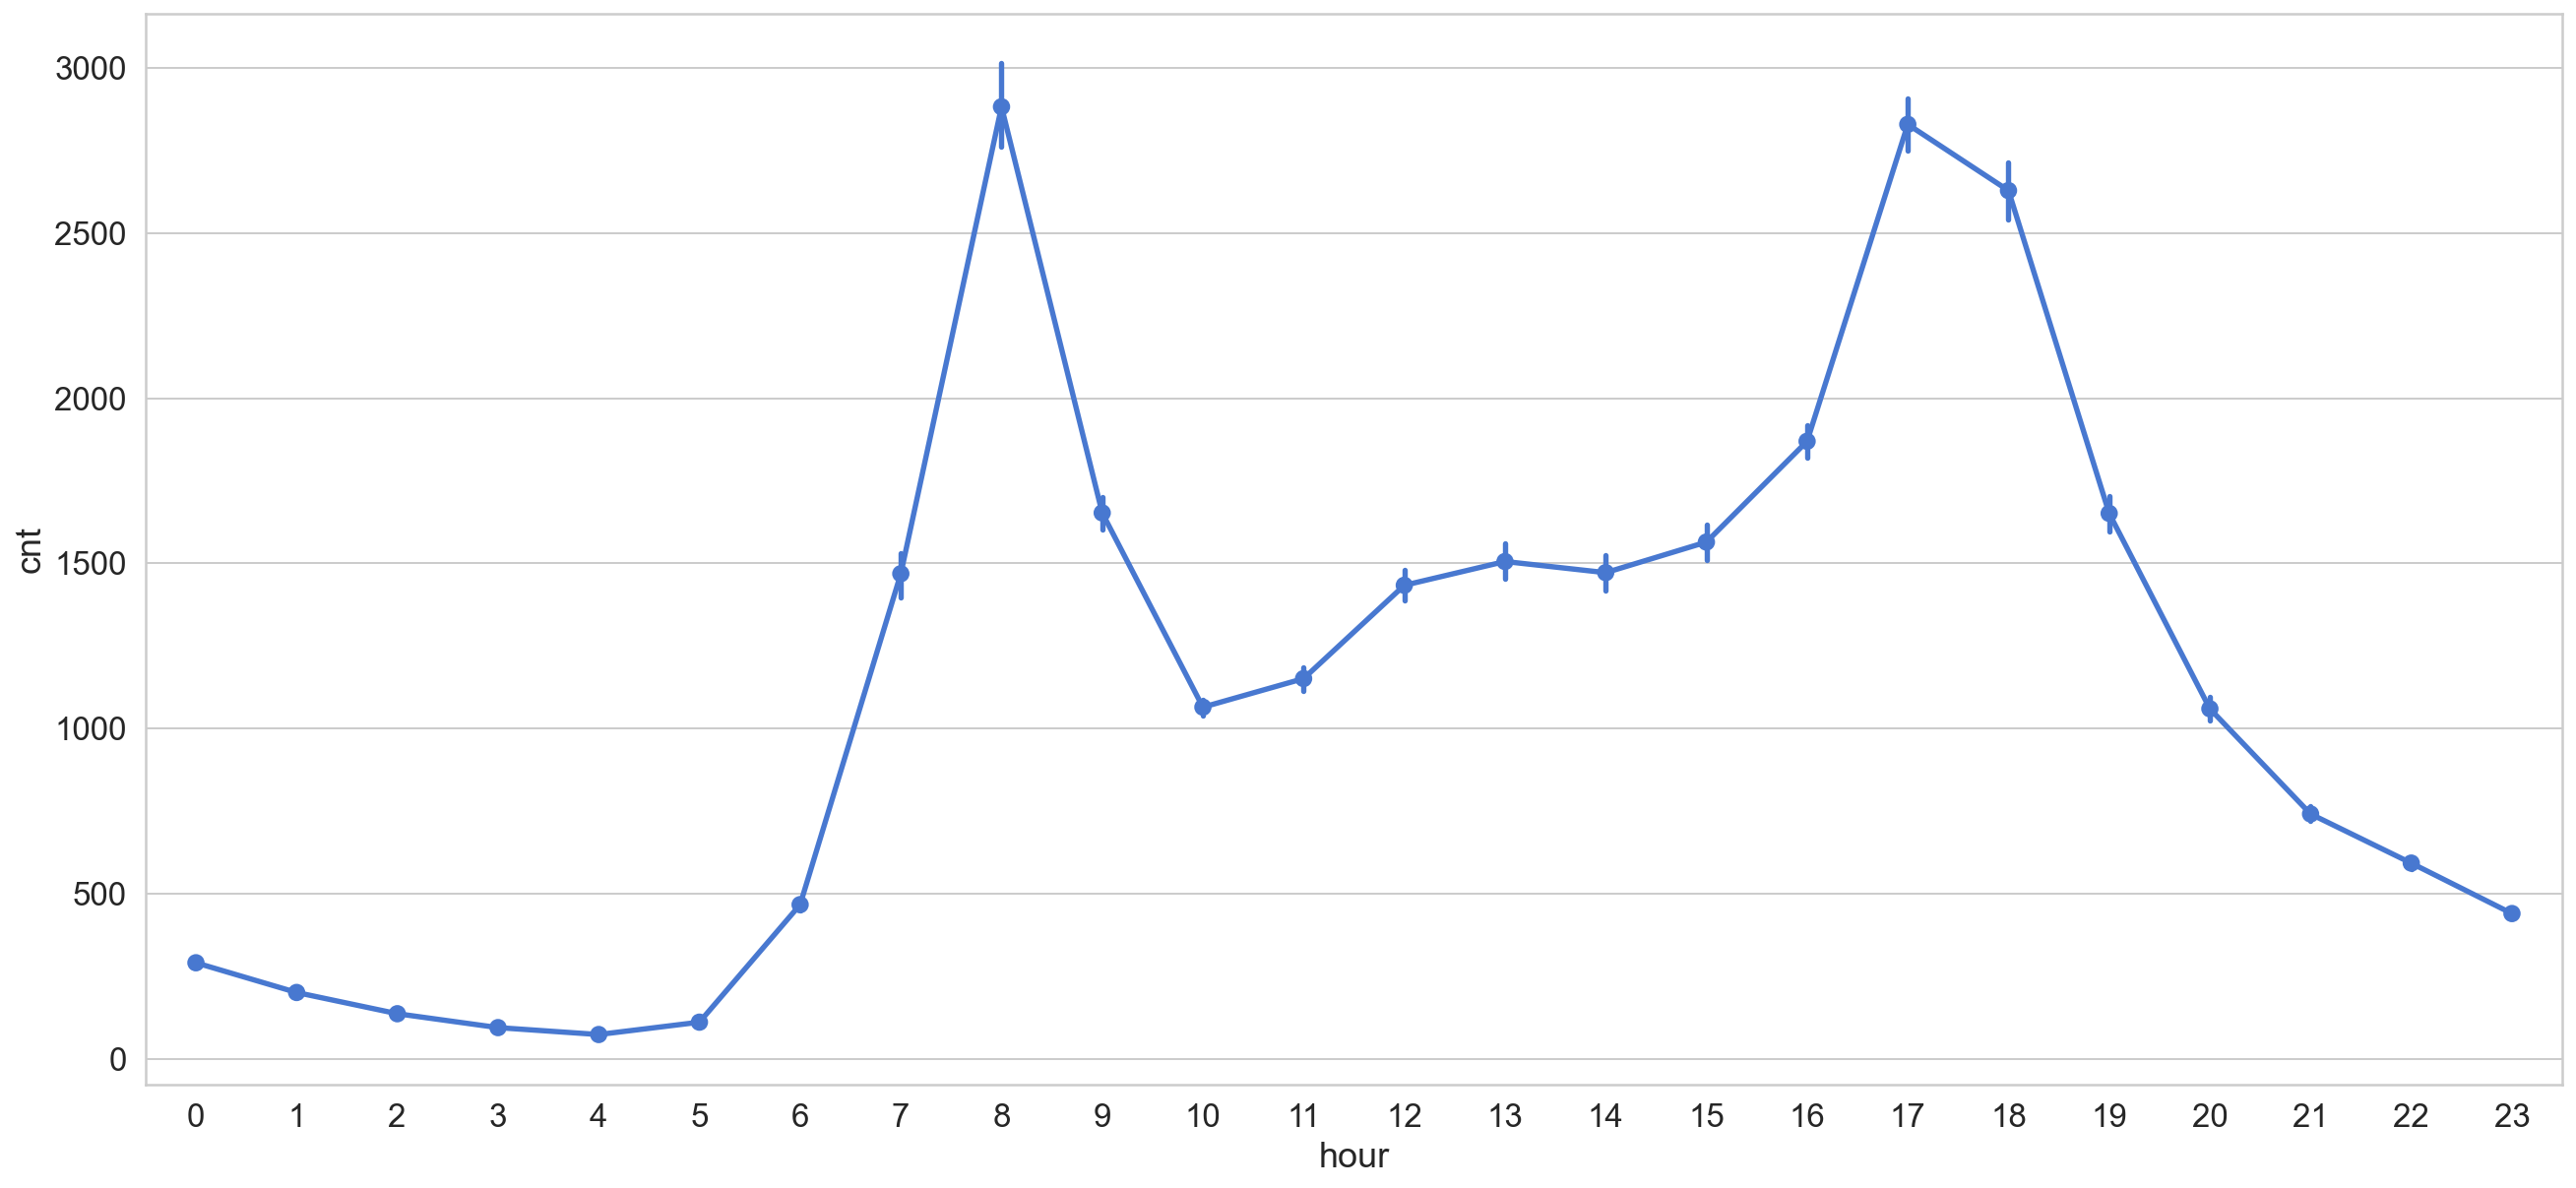

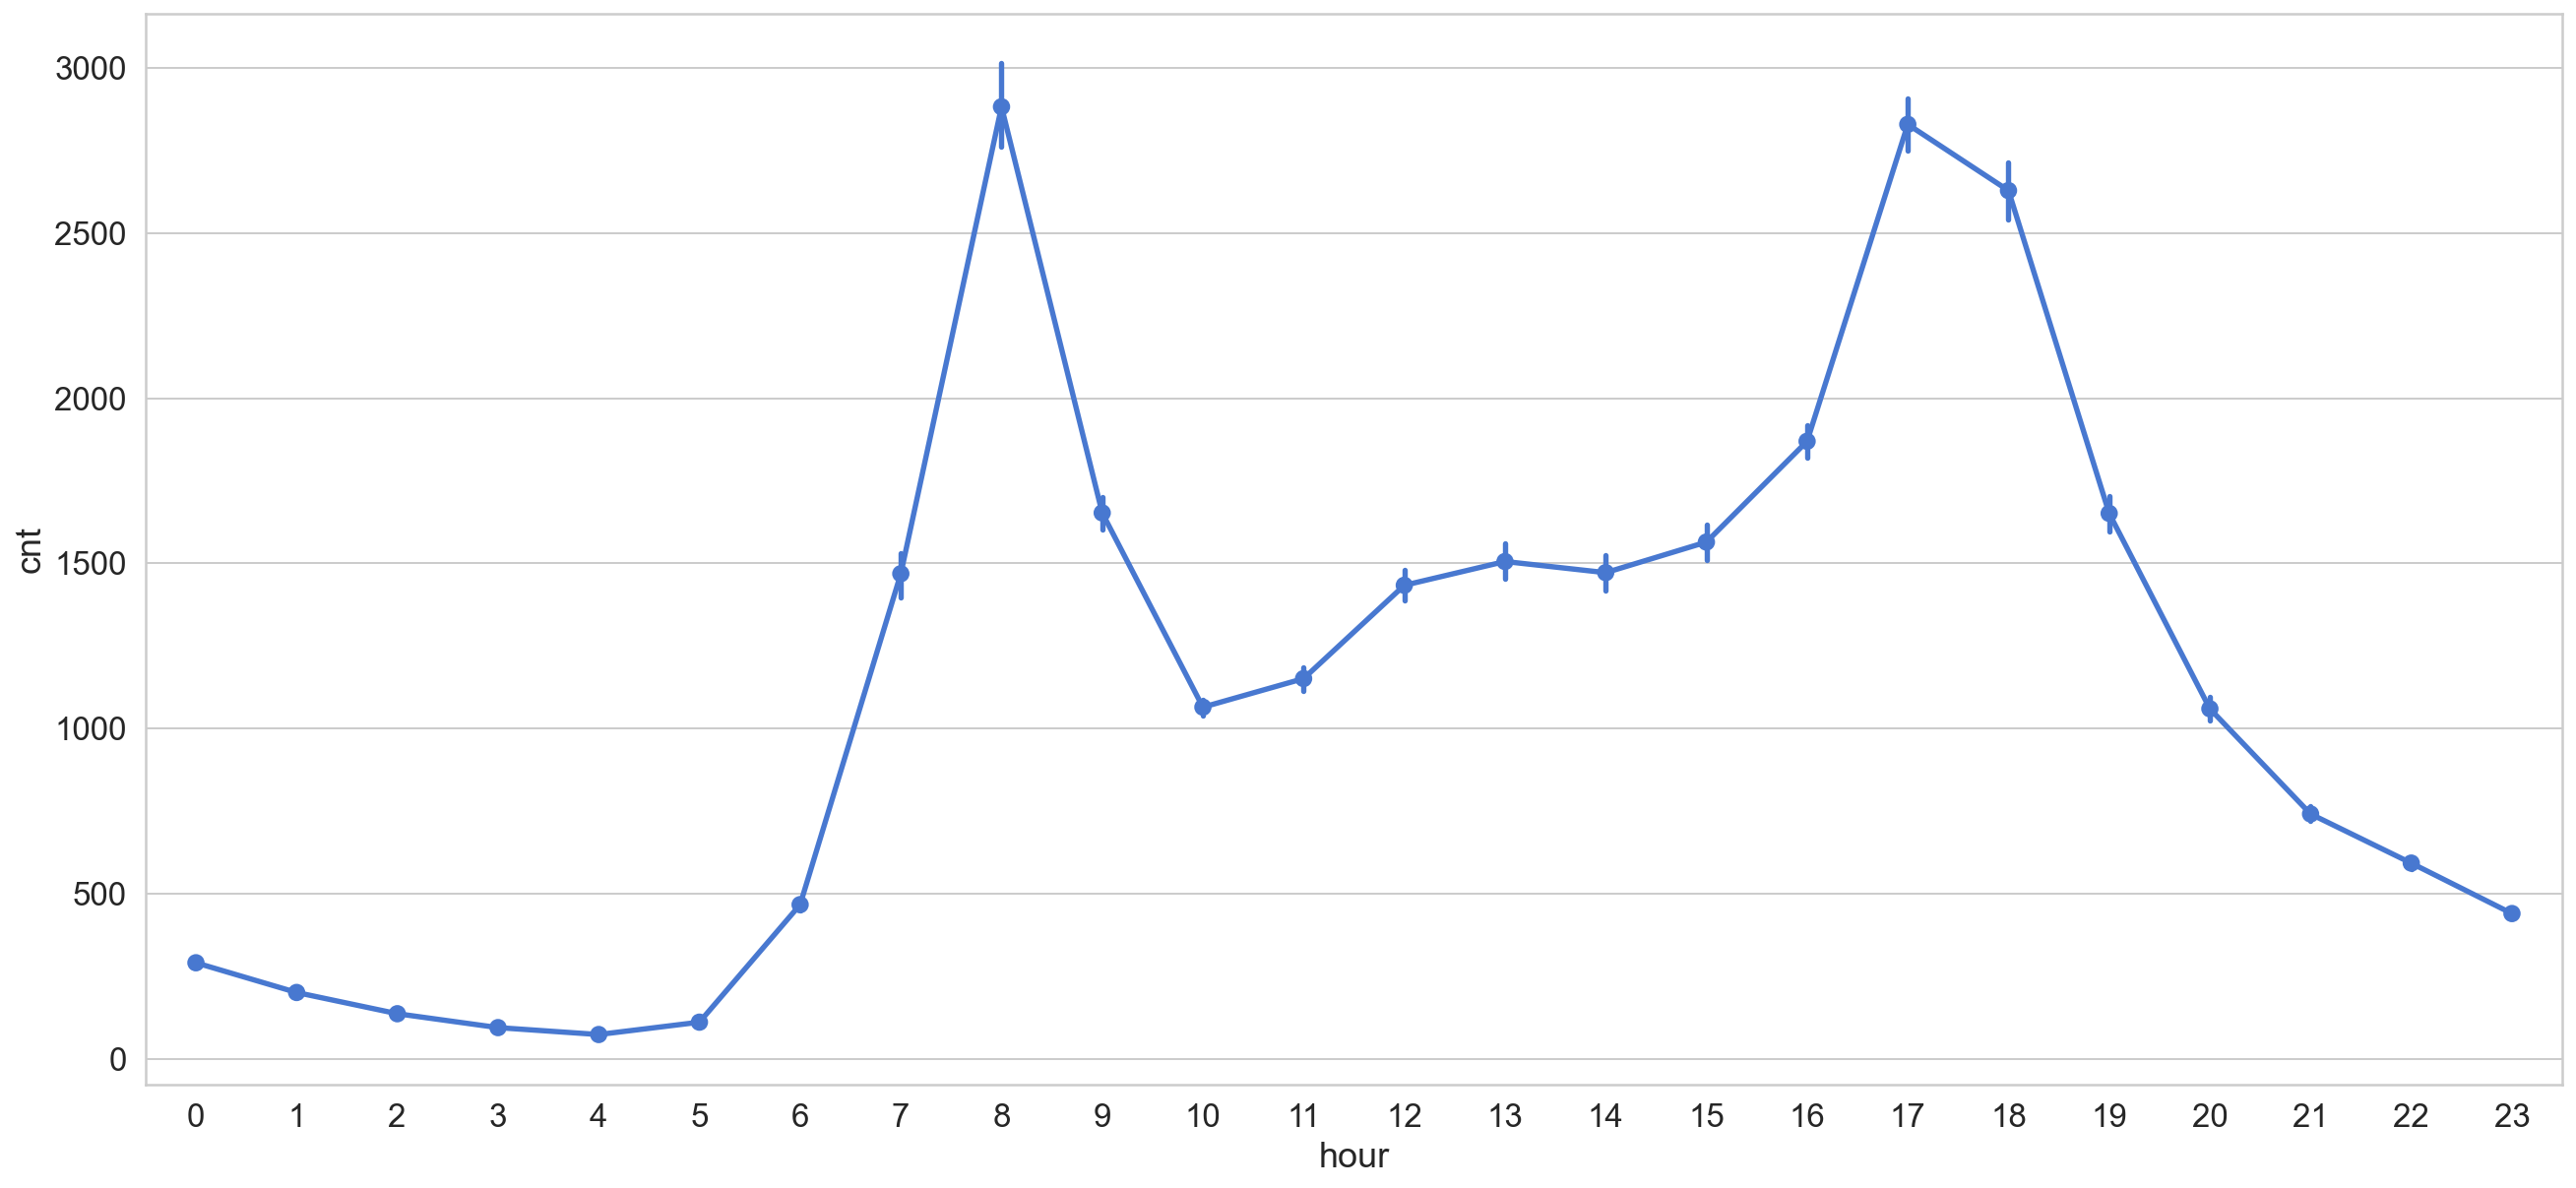

In [42]:
sns.pointplot(data = df,x = 'hour',y = 'cnt')

<AxesSubplot:xlabel='hour', ylabel='cnt'>

<AxesSubplot:xlabel='hour', ylabel='cnt'>

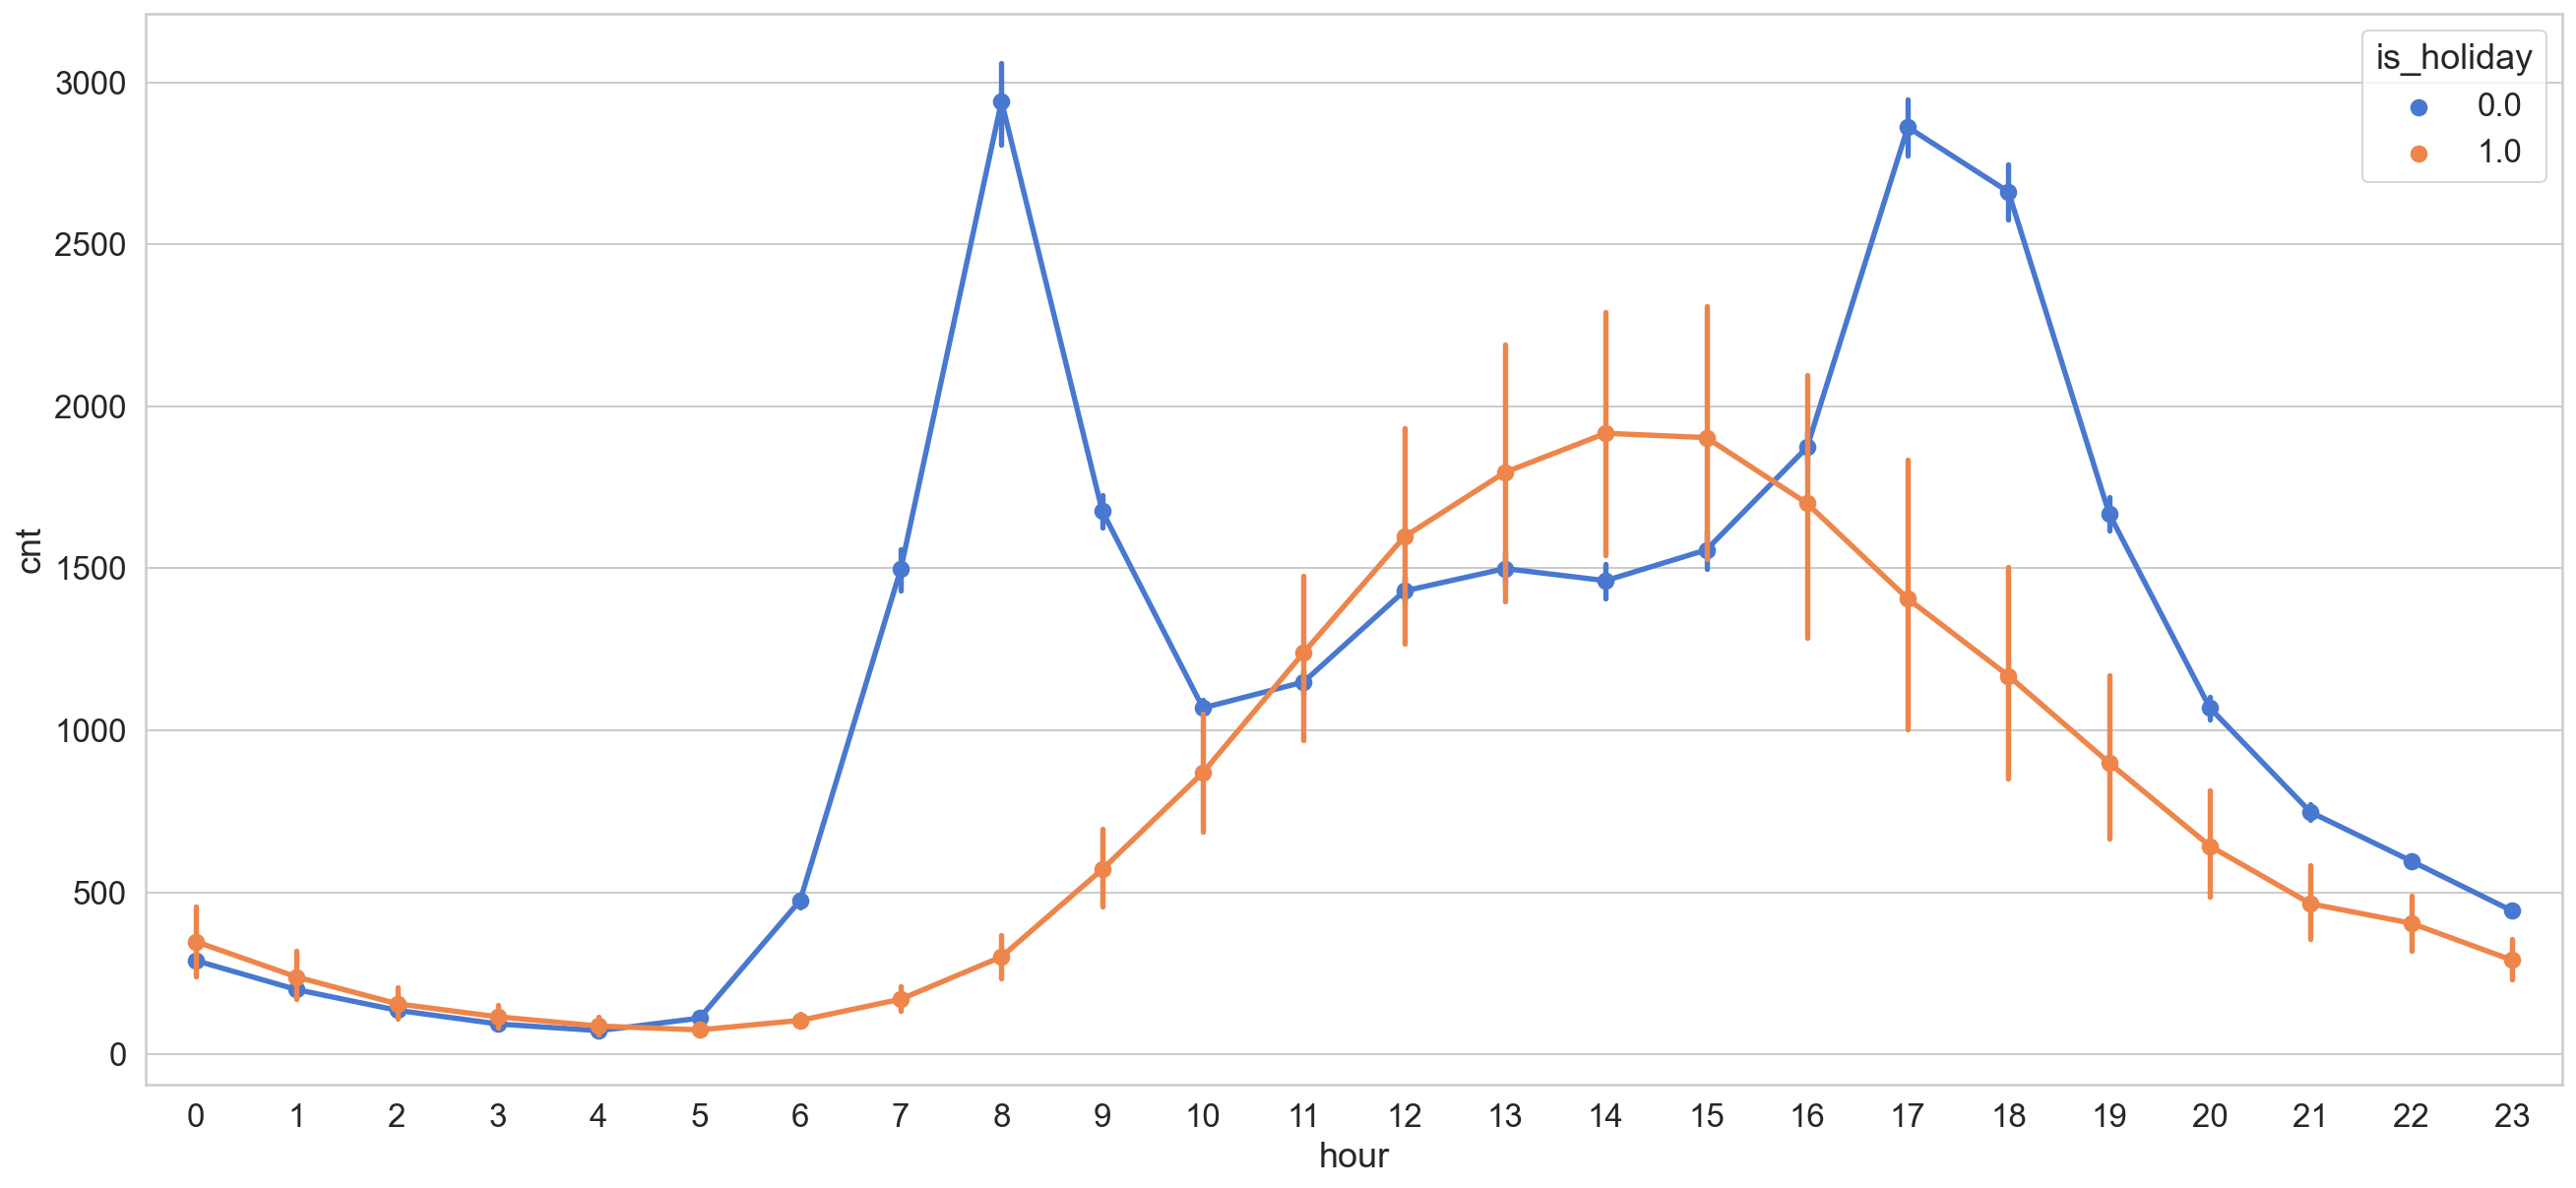

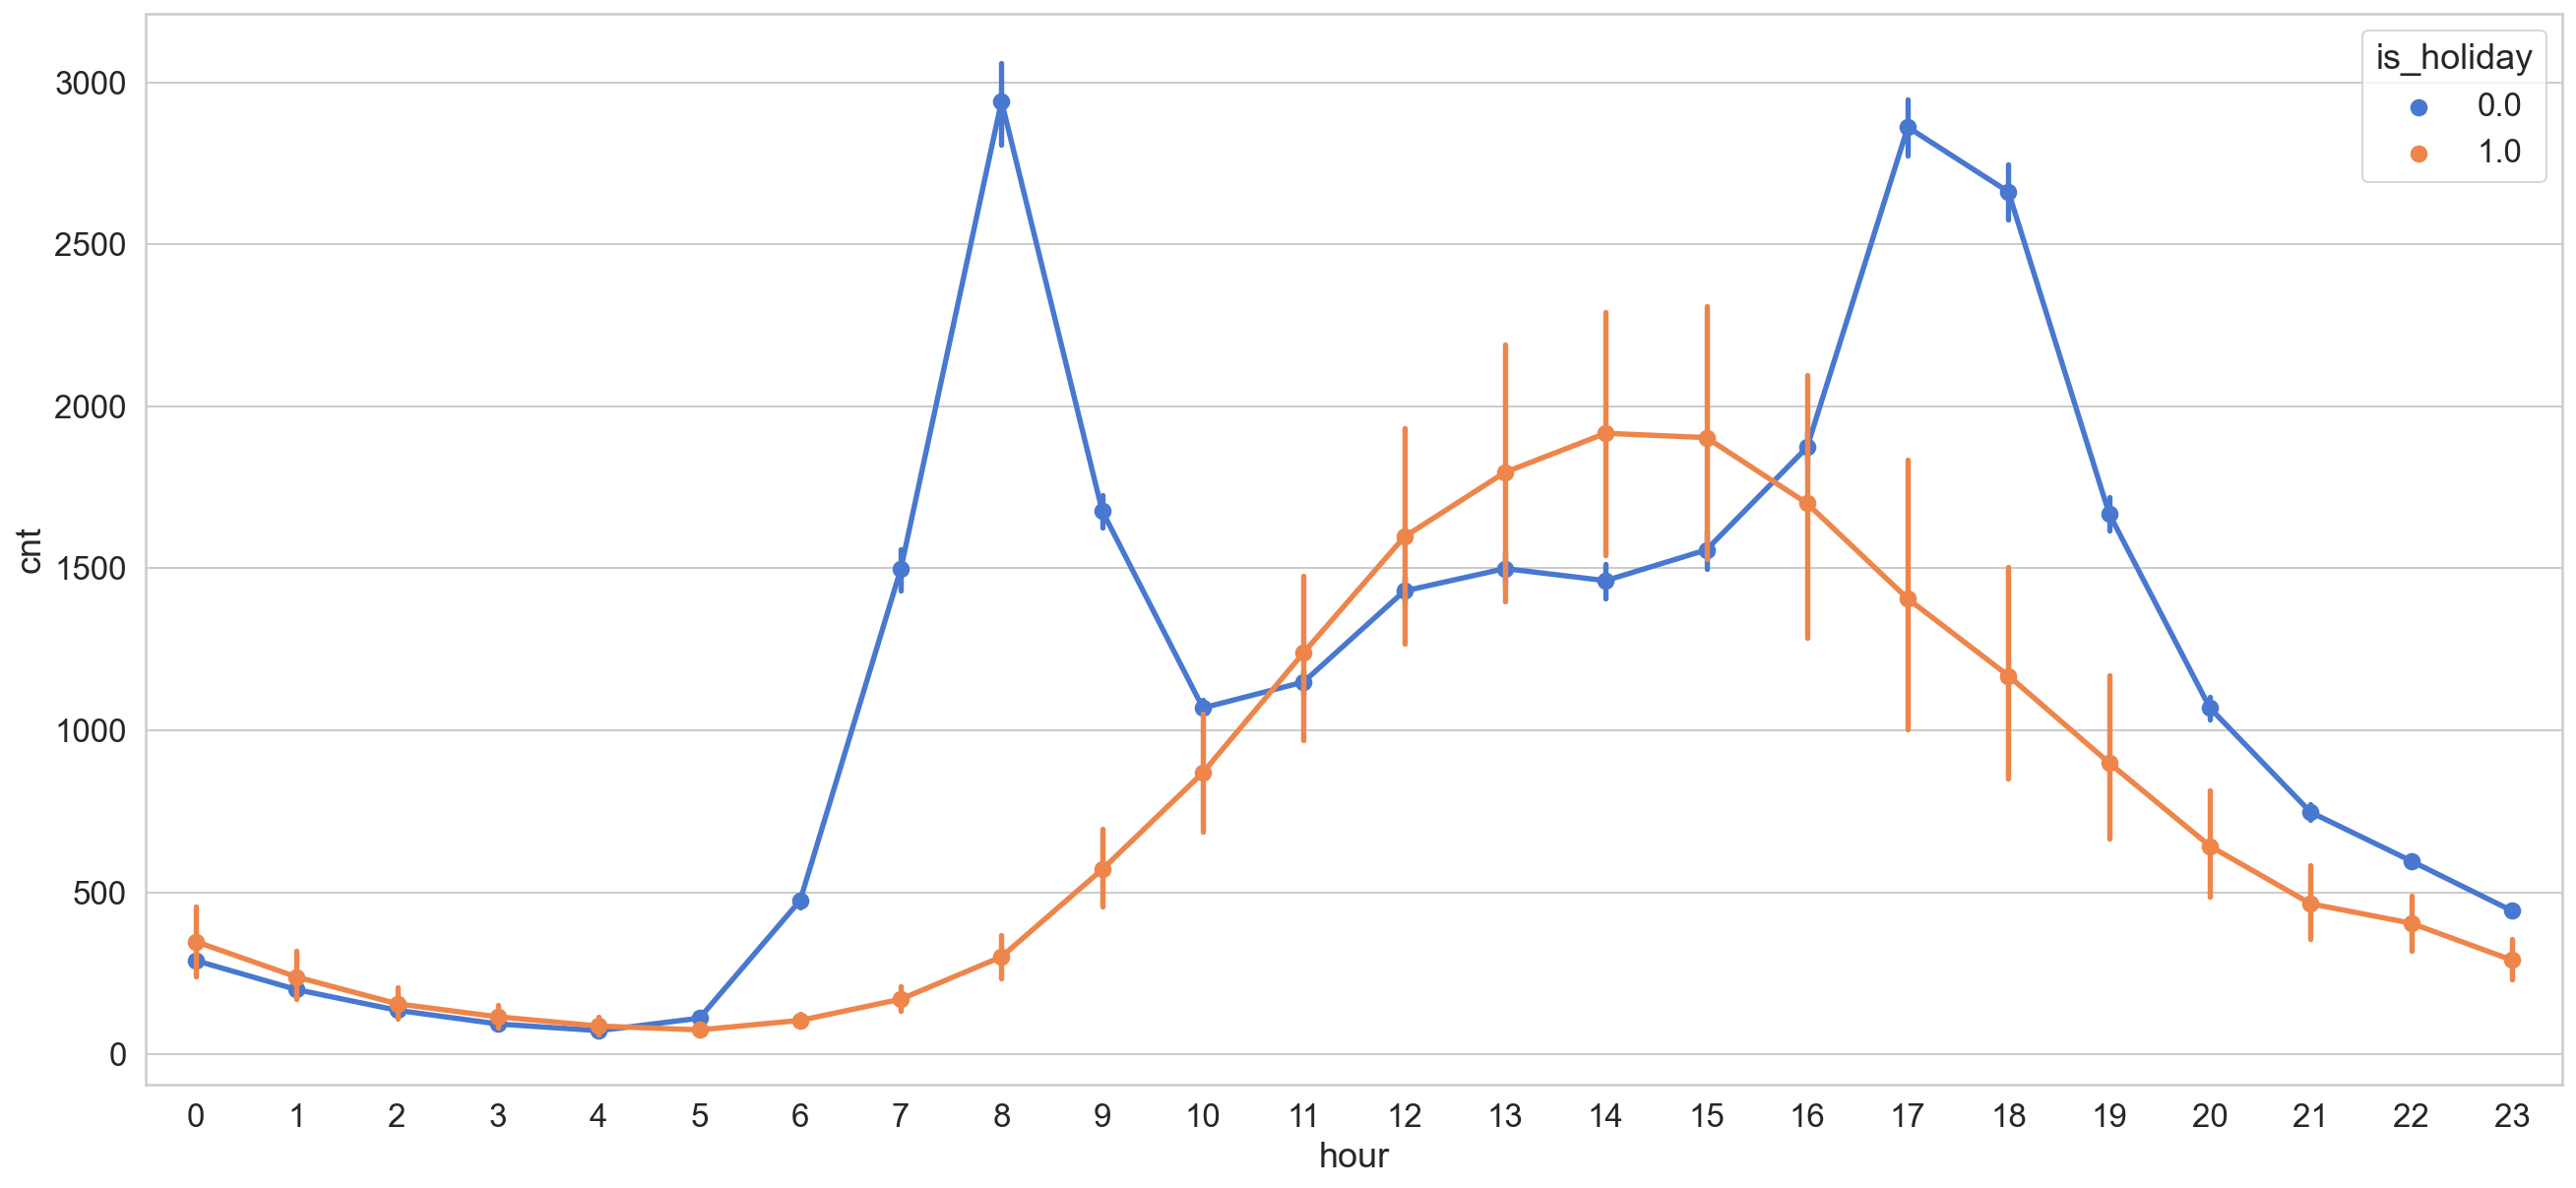

In [43]:
sns.pointplot(data = df,x = 'hour',y = 'cnt',hue = 'is_holiday')

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

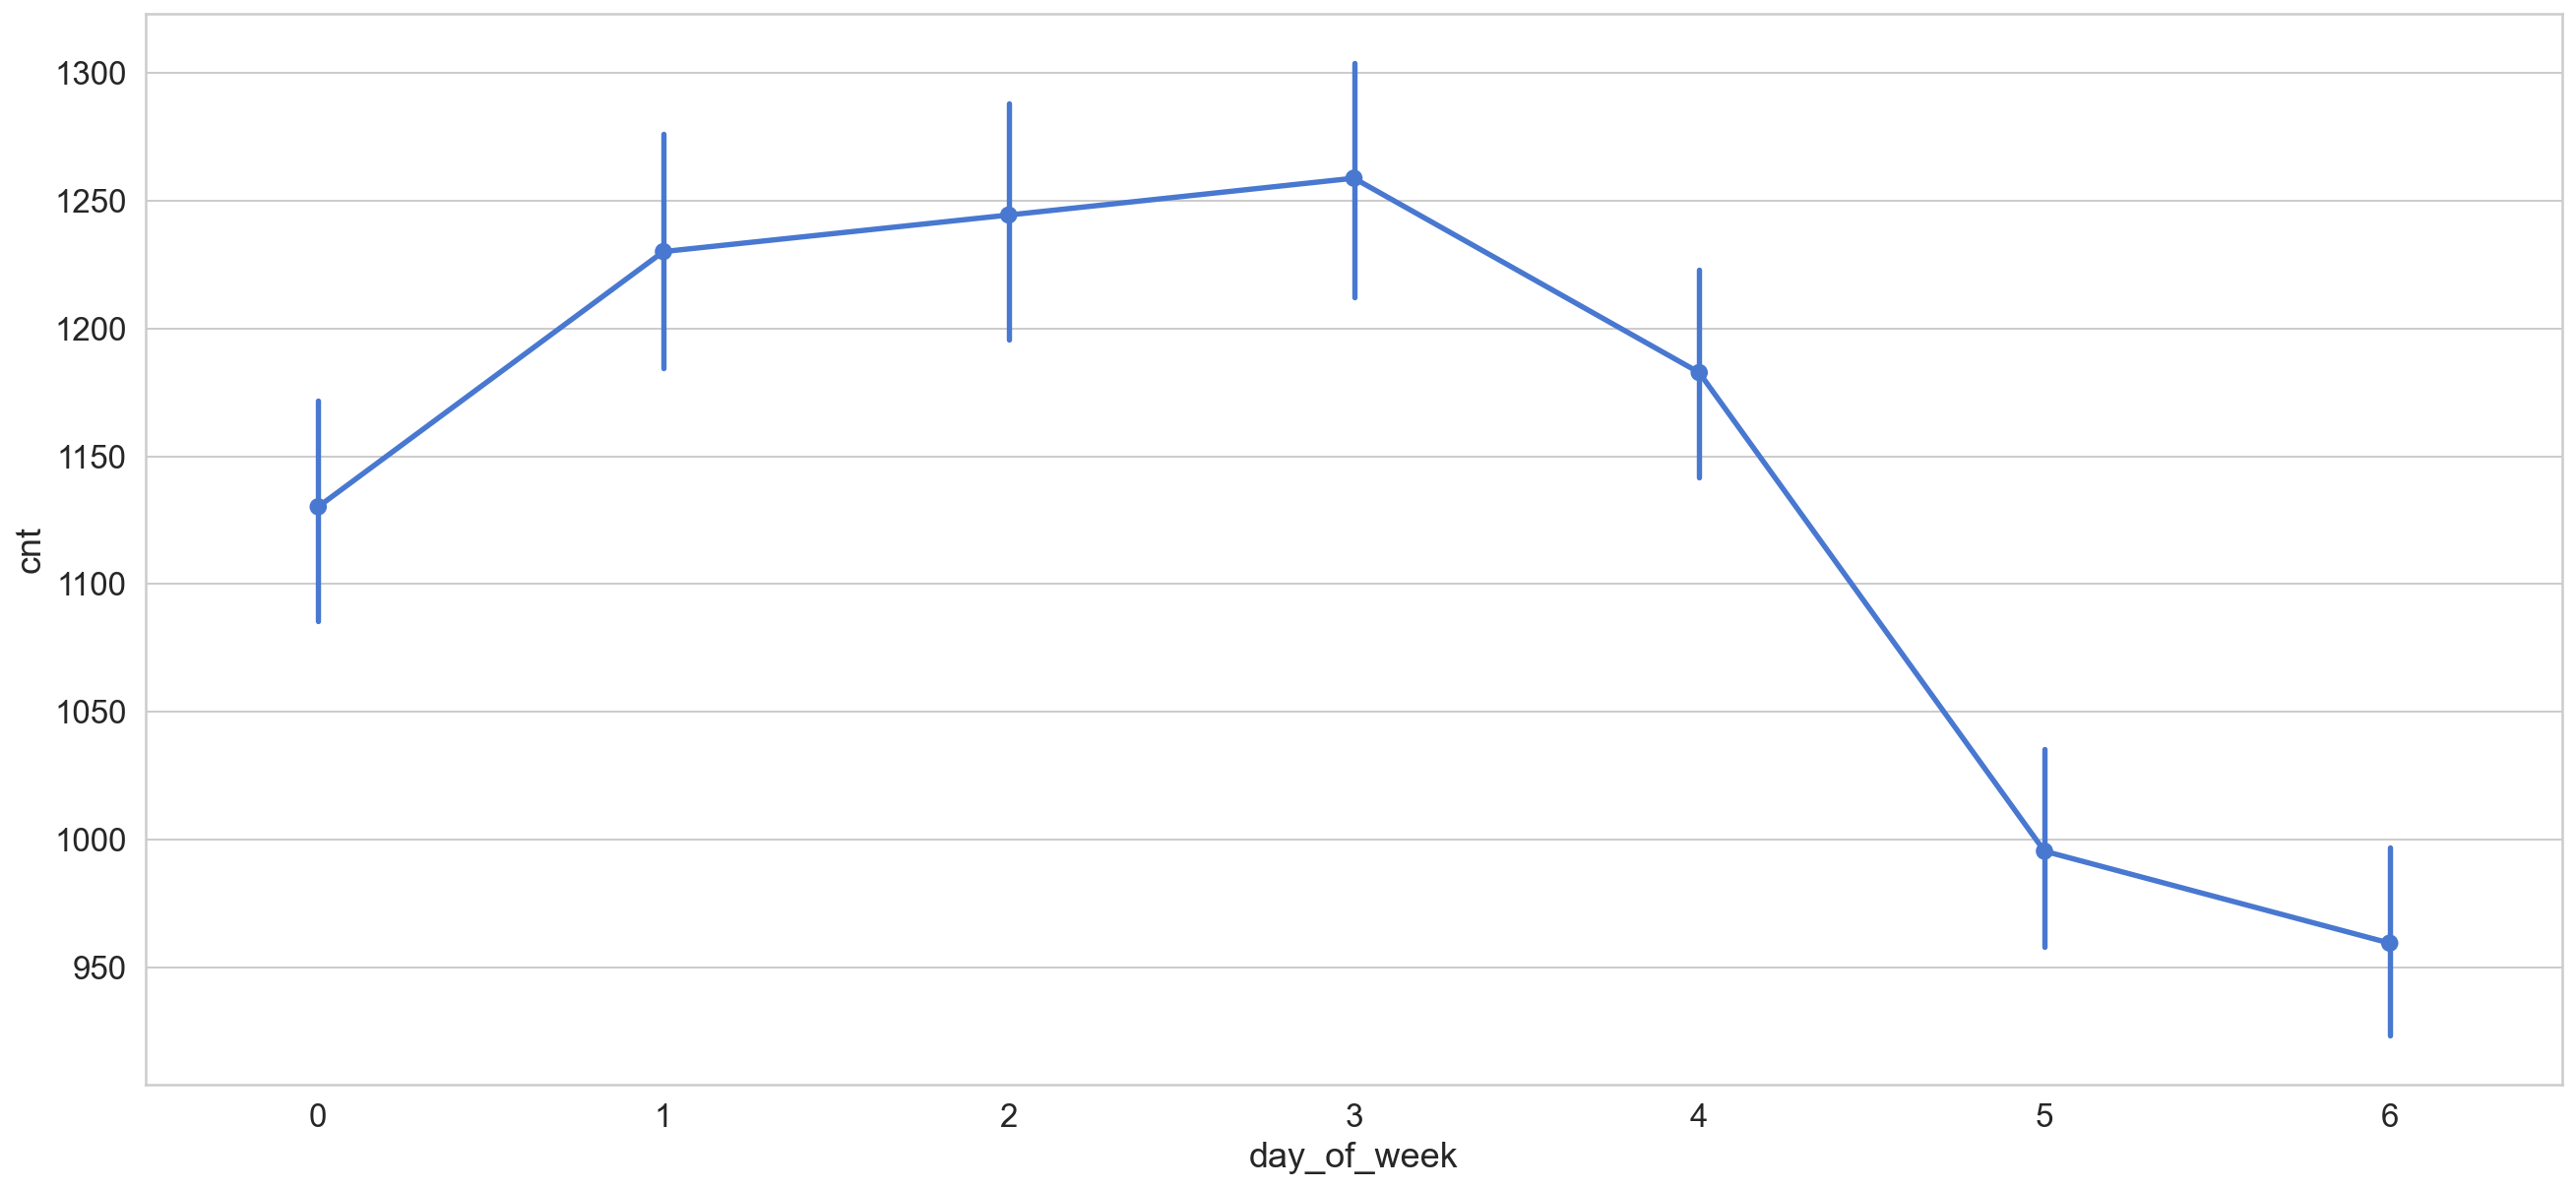

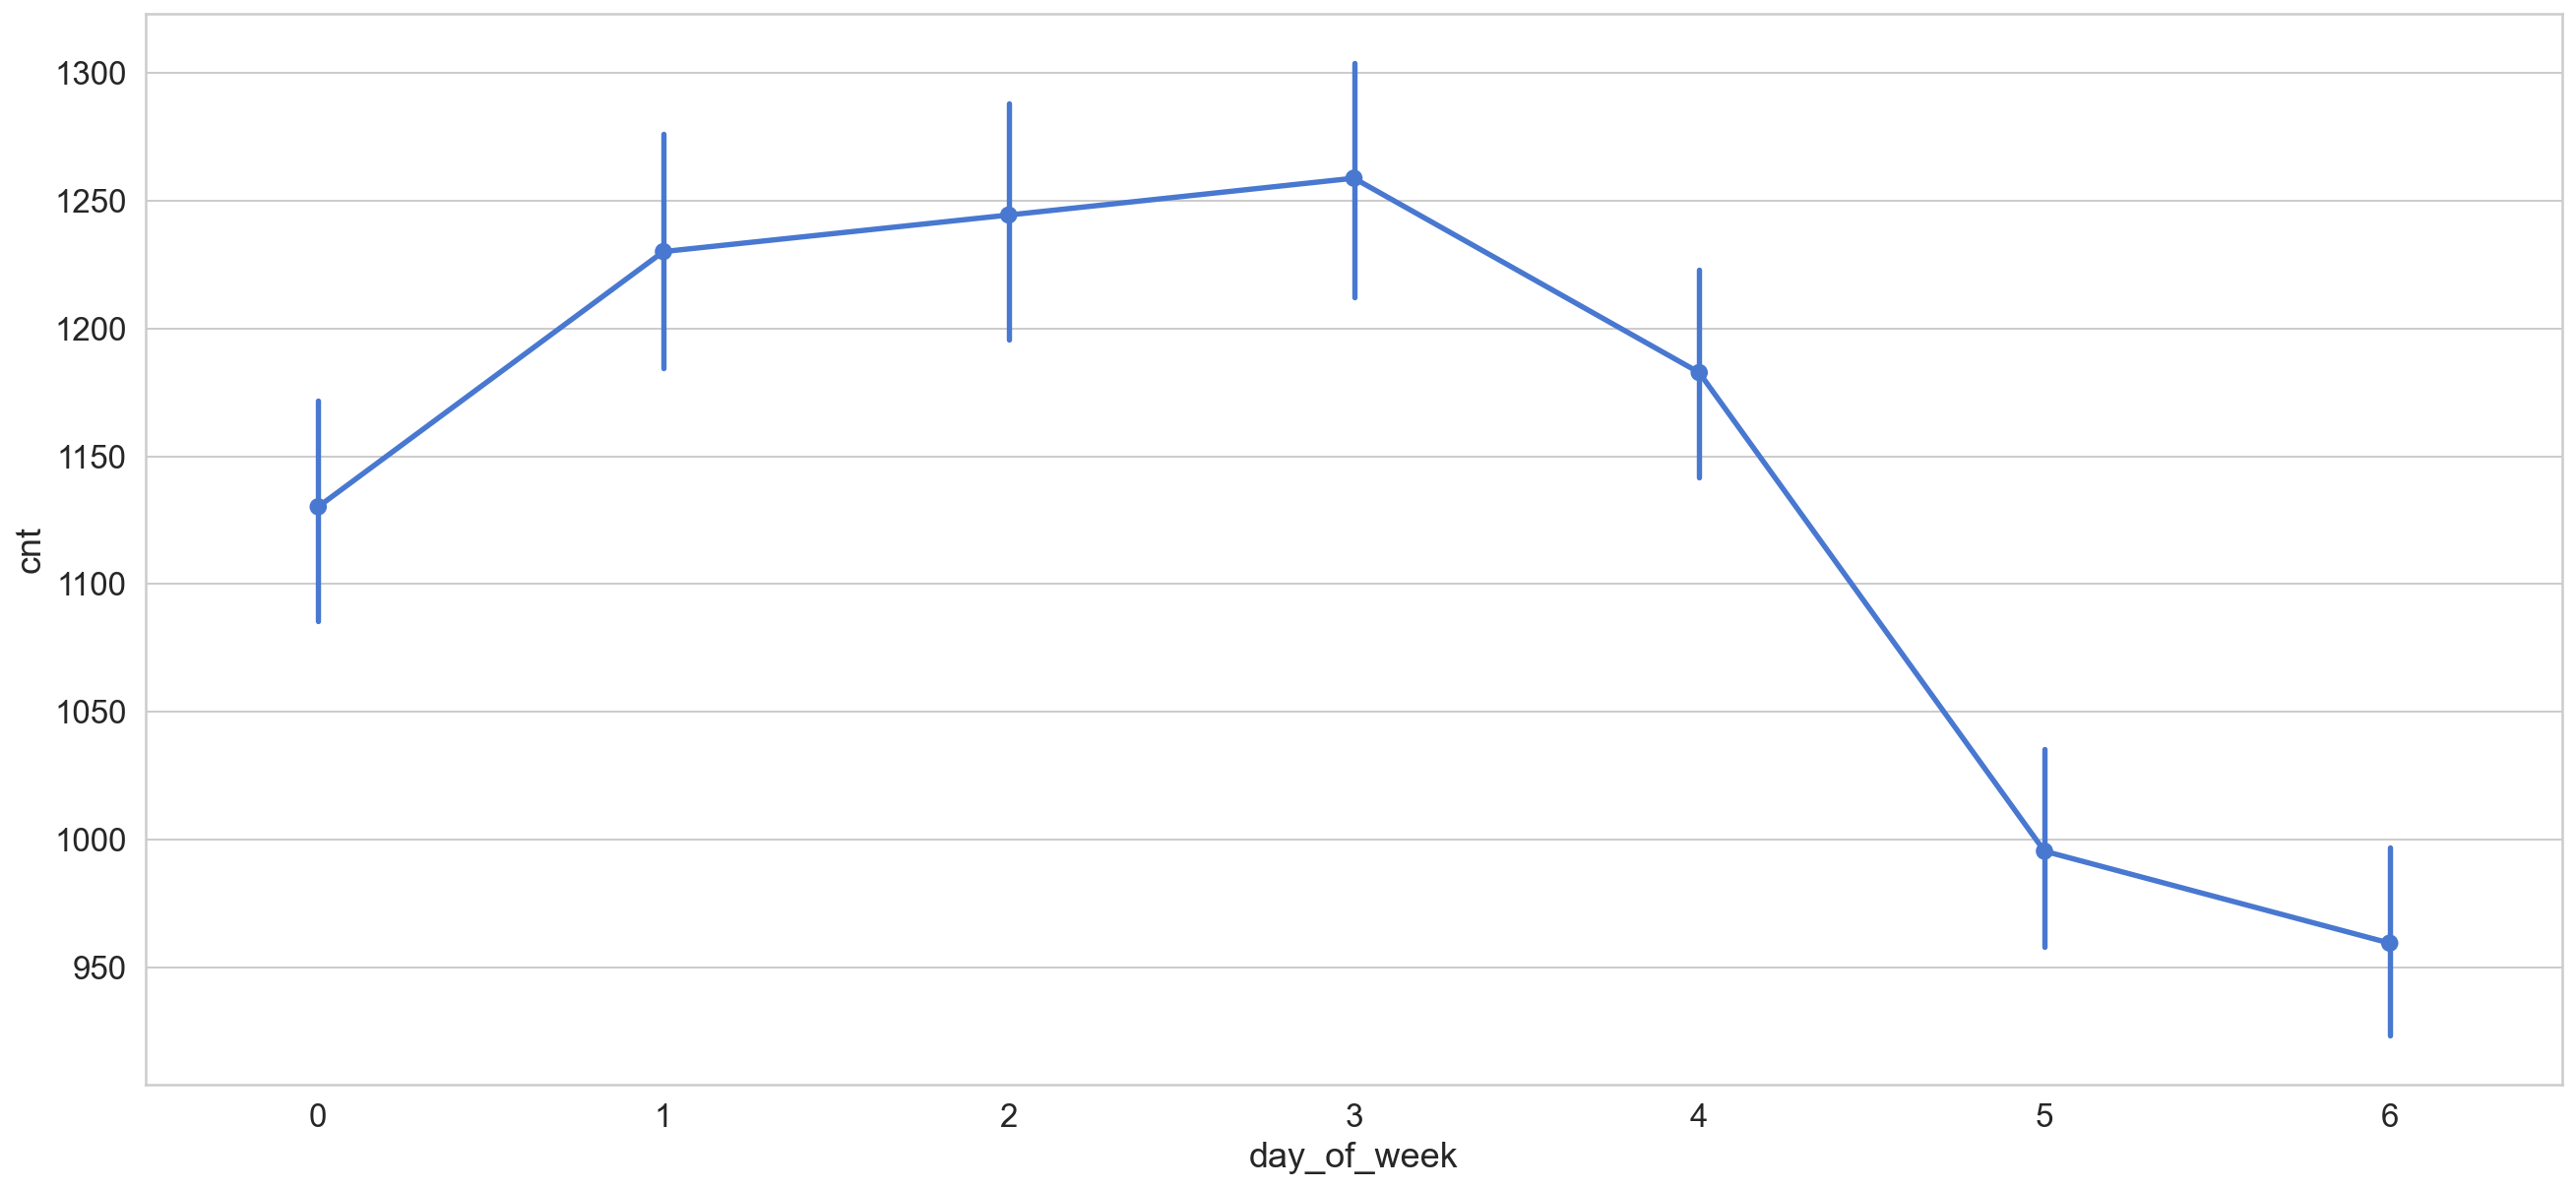

In [44]:
sns.pointplot(data = df,x = 'day_of_week',y = 'cnt')

In [45]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train,test = df.iloc[0:train_size],df.iloc[train_size:len(df)]
print(train.shape,test.shape)

(15672, 13) (1742, 13)
(15672, 13) (1742, 13)


## Scaling the Values

In [46]:
from sklearn.preprocessing import RobustScaler

## Choosing Significant Columns

In [47]:
f_columns = ['t1','t2','hum','wind_speed']
f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

## Storing values in Numpy Arrays

In [48]:
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

In [49]:
train.loc[:,f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

D:\Anaconda_2021\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-49-1f8a184678dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cnt'] = cnt_transformer.transform(train[['cnt']])
D:\Anaconda_2021\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [50]:
test.loc[:,f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

D:\Anaconda_2021\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-50-efd773f2308d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cnt'] = cnt_transformer.transform(test[['cnt']])
D:\Anaconda_2021\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [51]:
def create_dataset(X,y,time_steps = 1):
    Xs,ys = [],[]
    
    
    for i in range(len(X) - time_steps):
        v = X.iloc[i: (i+time_steps)].to_numpy()
        
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
        
    return np.array(Xs),np.array(ys)

TIME_STEPS = 24

## Training and Testing

In [52]:
X_train,y_train = create_dataset(train,train.cnt,time_steps = TIME_STEPS)
X_test,y_test = create_dataset(test,test.cnt,time_steps = TIME_STEPS)

In [53]:
print(X_train.shape,y_train.shape)

(15648, 24, 13) (15648,)
(15648, 24, 13) (15648,)


In [54]:
print(X_test.shape,y_test.shape)

(1718, 24, 13) (1718,)
(1718, 24, 13) (1718,)


In [55]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units = 128,
            input_shape = (X_train.shape[1],X_train.shape[2])
        )
    )

)

In [56]:
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(units = 1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [57]:
history = model.fit(
    X_train,y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.1,
    shuffle = False

)

Epoch 1/10
Epoch 1/10
441/441 [==============================] - 551s 1s/step - loss: 0.3233 - val_loss: 0.1592
Epoch 2/10
Epoch 2/10
441/441 [==============================] - 539s 1s/step - loss: 0.1123 - val_loss: 0.0683
Epoch 3/10
Epoch 3/10
441/441 [==============================] - 541s 1s/step - loss: 0.0658 - val_loss: 0.0489
Epoch 4/10
Epoch 4/10
441/441 [==============================] - 533s 1s/step - loss: 0.0456 - val_loss: 0.0423
Epoch 5/10
Epoch 5/10
441/441 [==============================] - 539s 1s/step - loss: 0.0388 - val_loss: 0.0340
Epoch 6/10
Epoch 6/10
441/441 [==============================] - 538s 1s/step - loss: 0.0332 - val_loss: 0.0384
Epoch 7/10
Epoch 7/10
441/441 [==============================] - 545s 1s/step - loss: 0.0290 - val_loss: 0.0427
Epoch 8/10
Epoch 8/10
441/441 [==============================] - 539s 1s/step - loss: 0.0281 - val_loss: 0.0311
Epoch 9/10
Epoch 9/10
441/441 [==============================] - 533s 1s/step - loss: 0.0255 - val_loss:

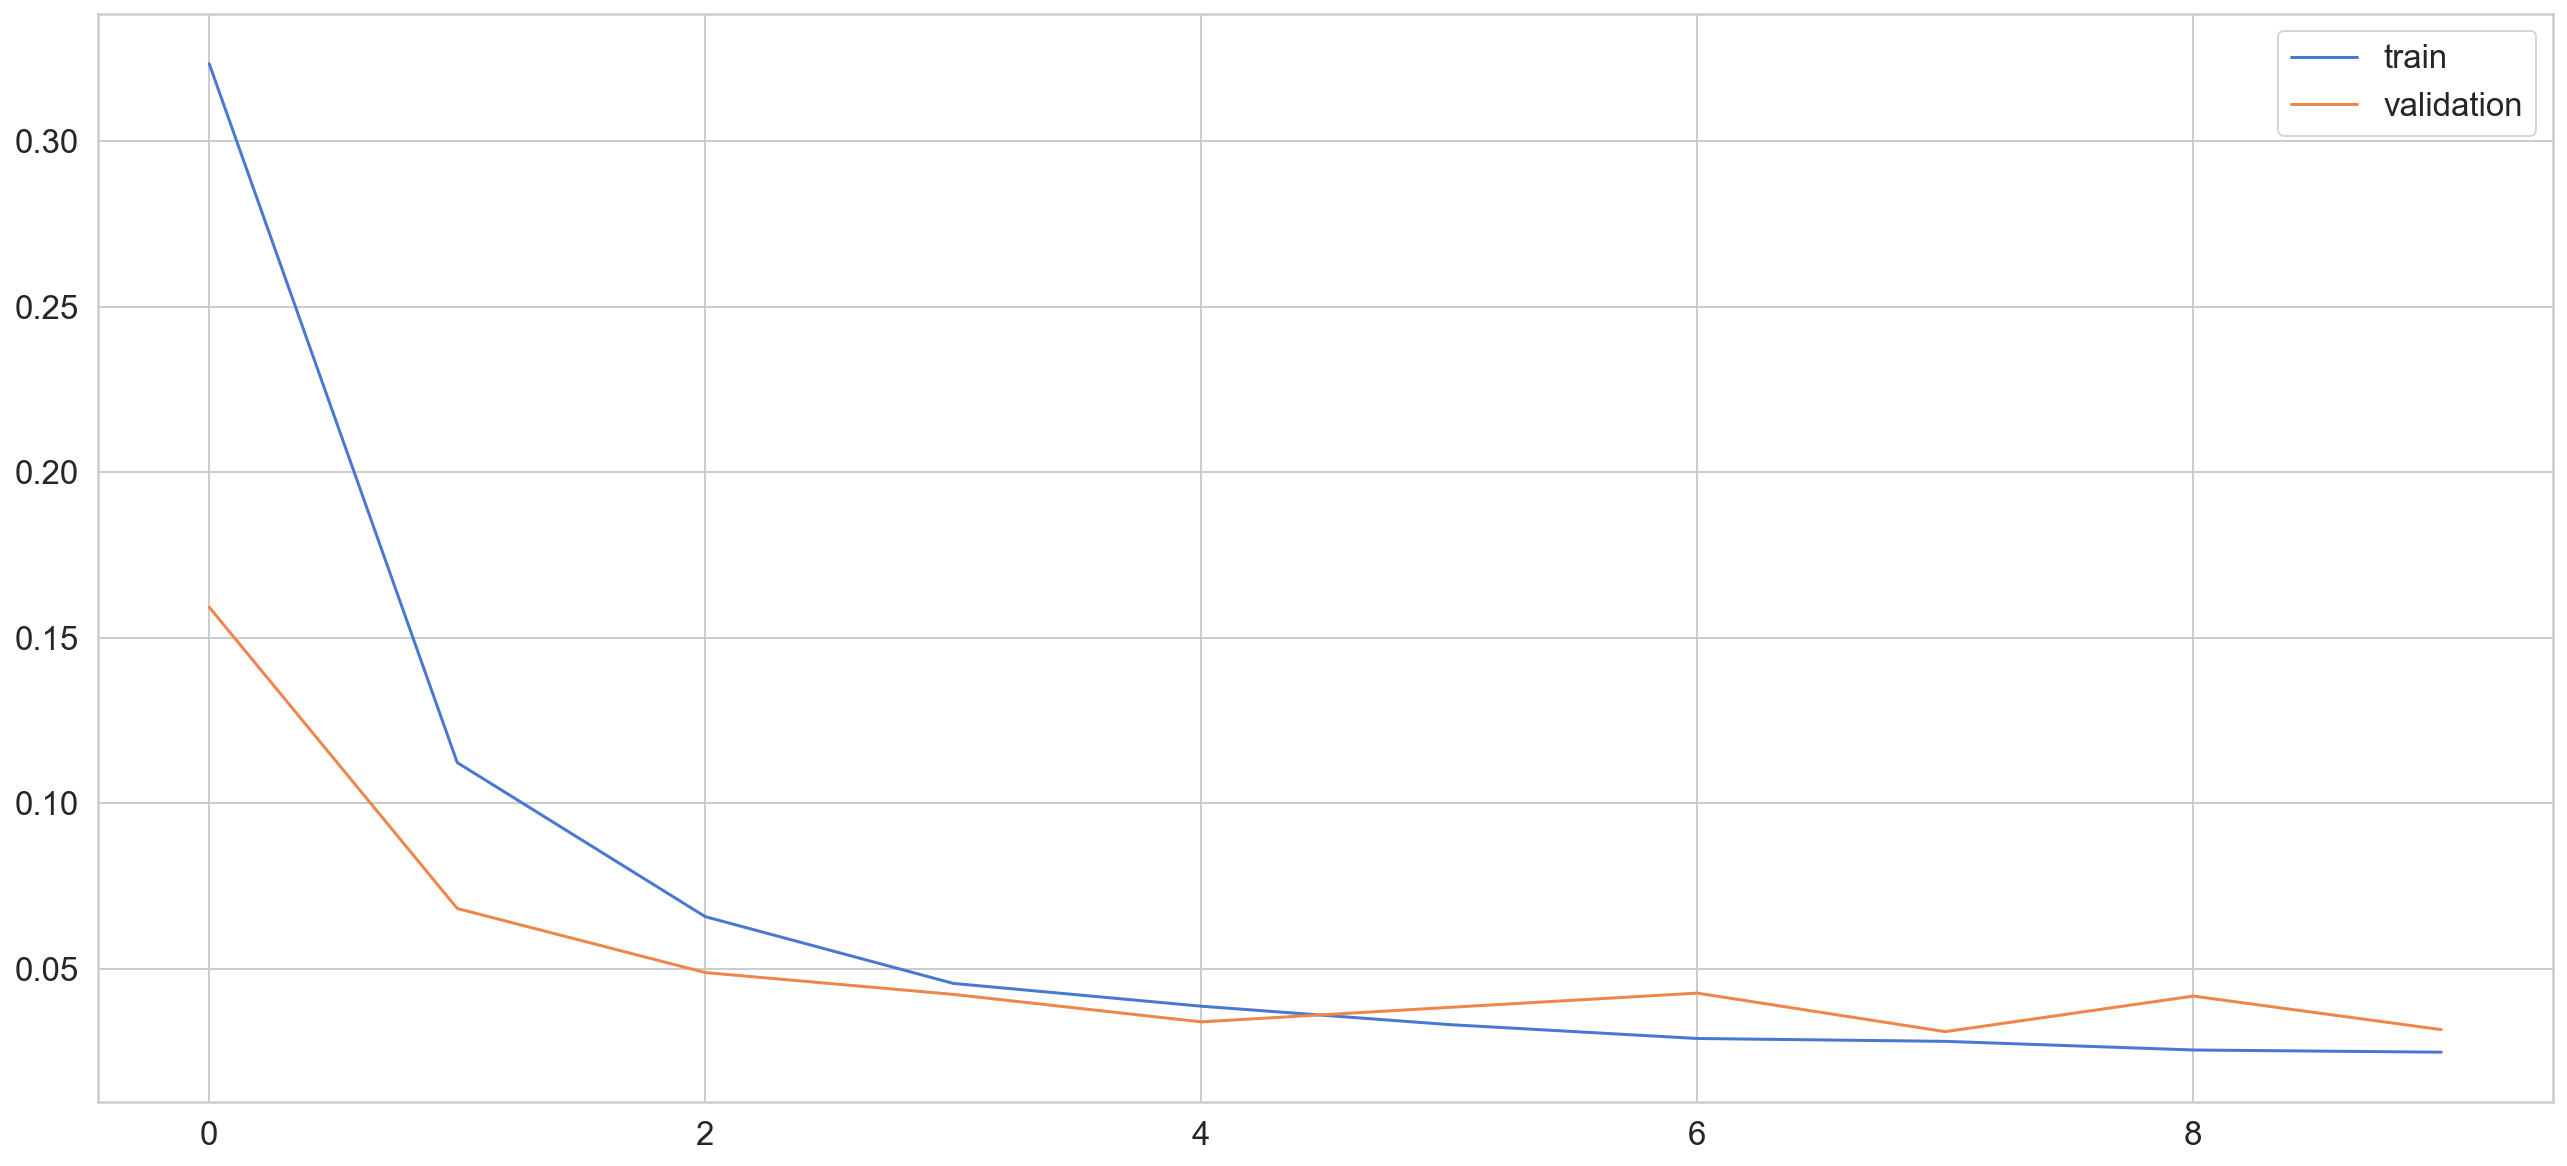

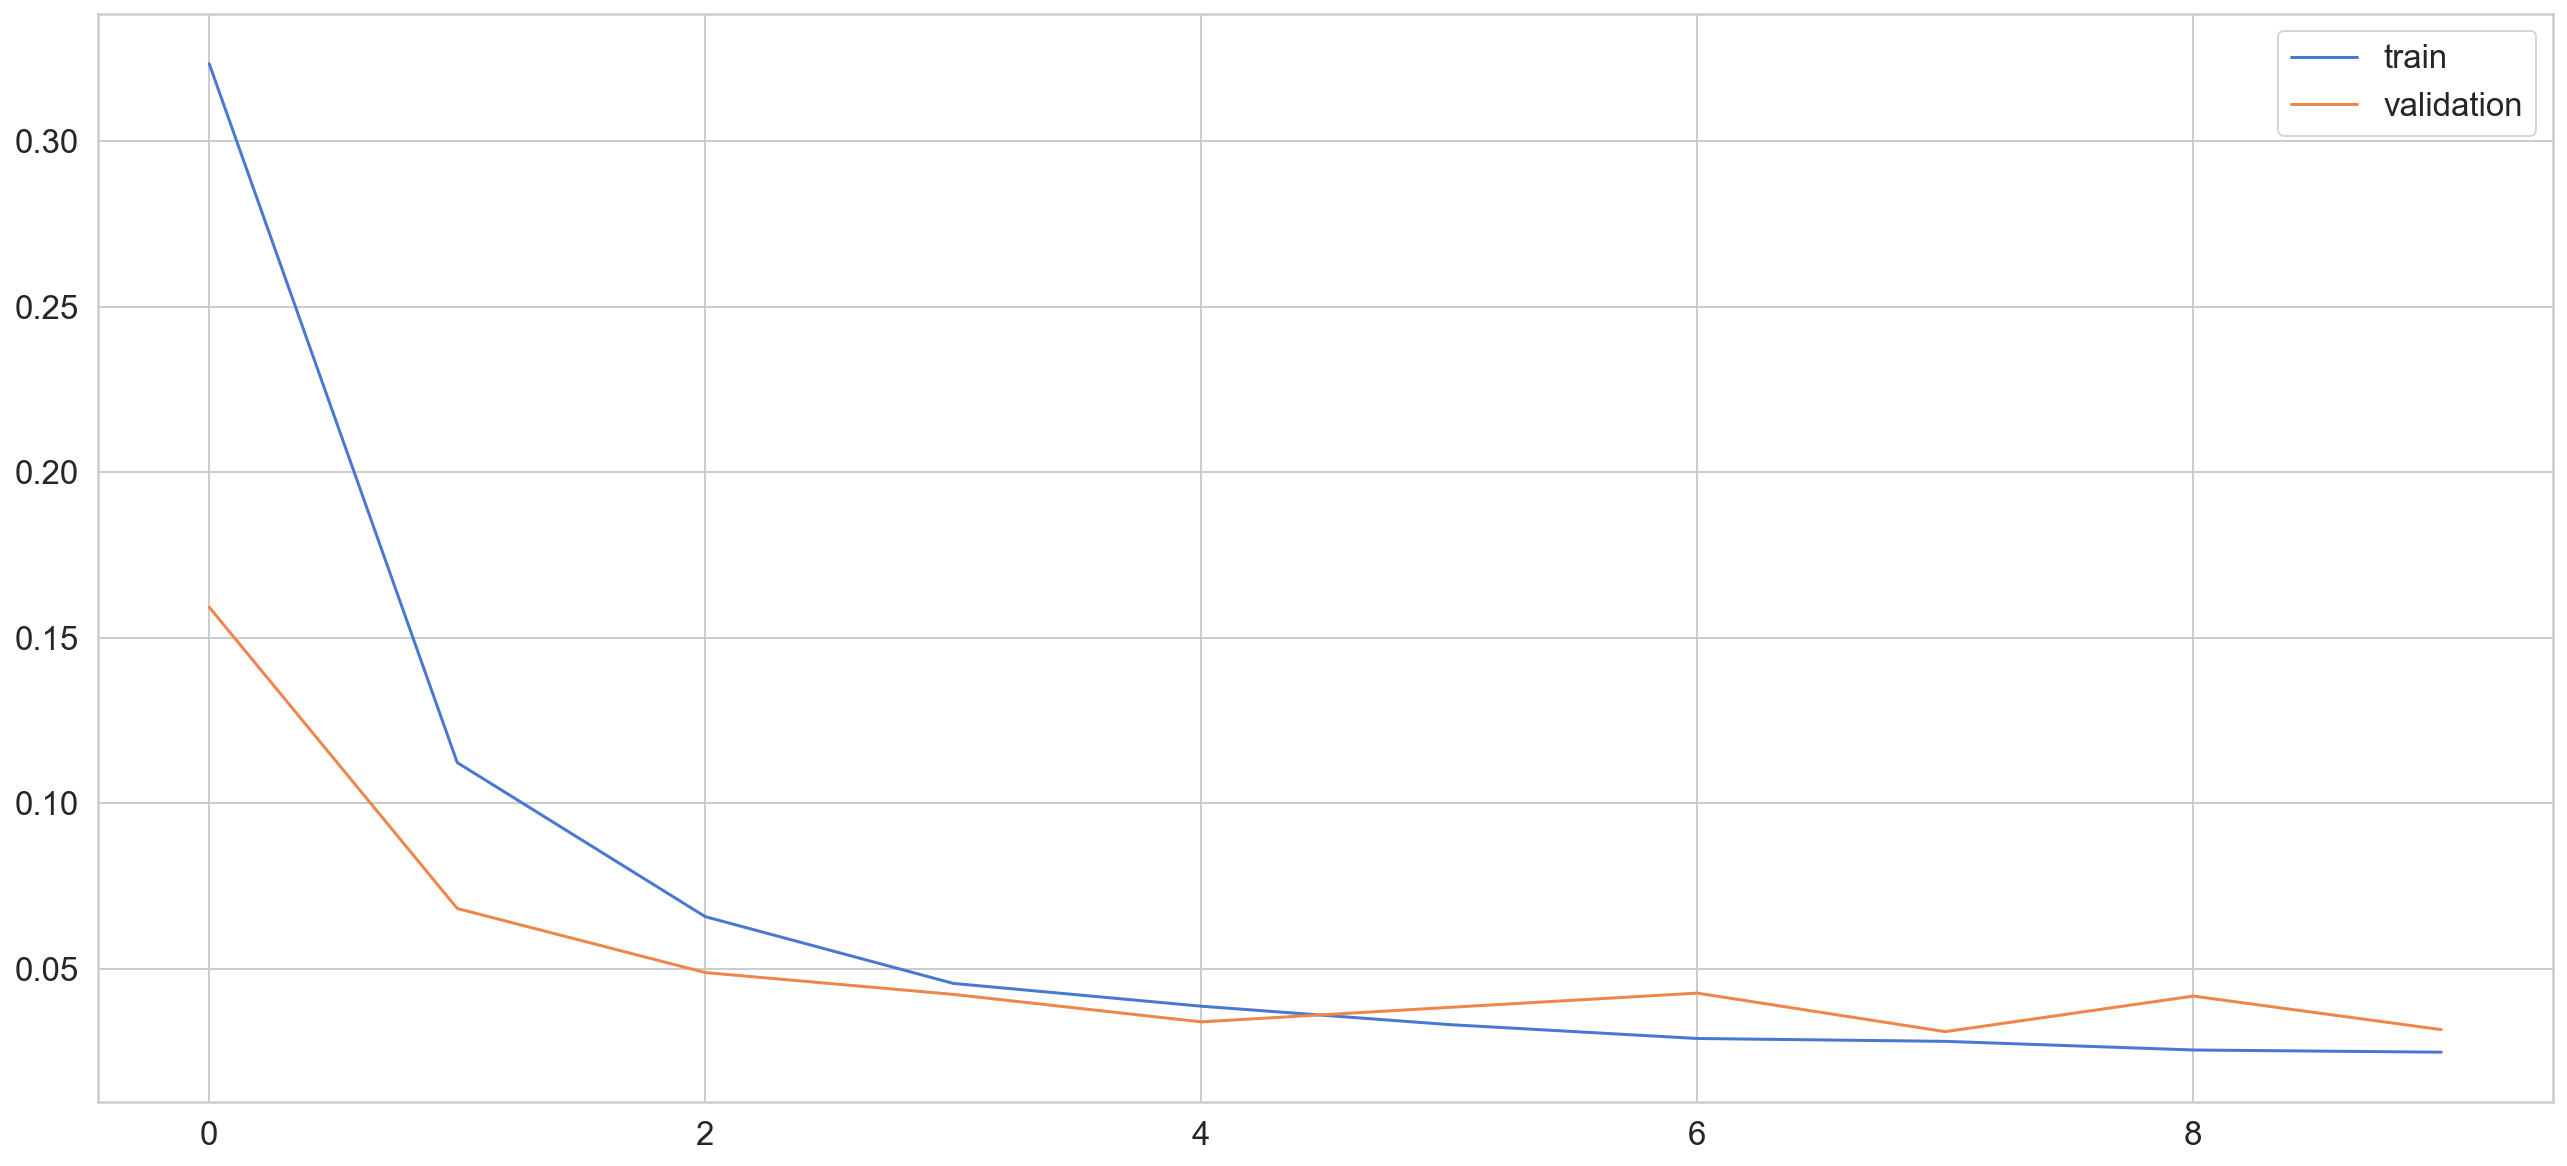

In [58]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'validation')
plt.legend()

## Making Predictions

In [59]:
y_pred = model.predict(X_test)

## Unscaling the values

In [60]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

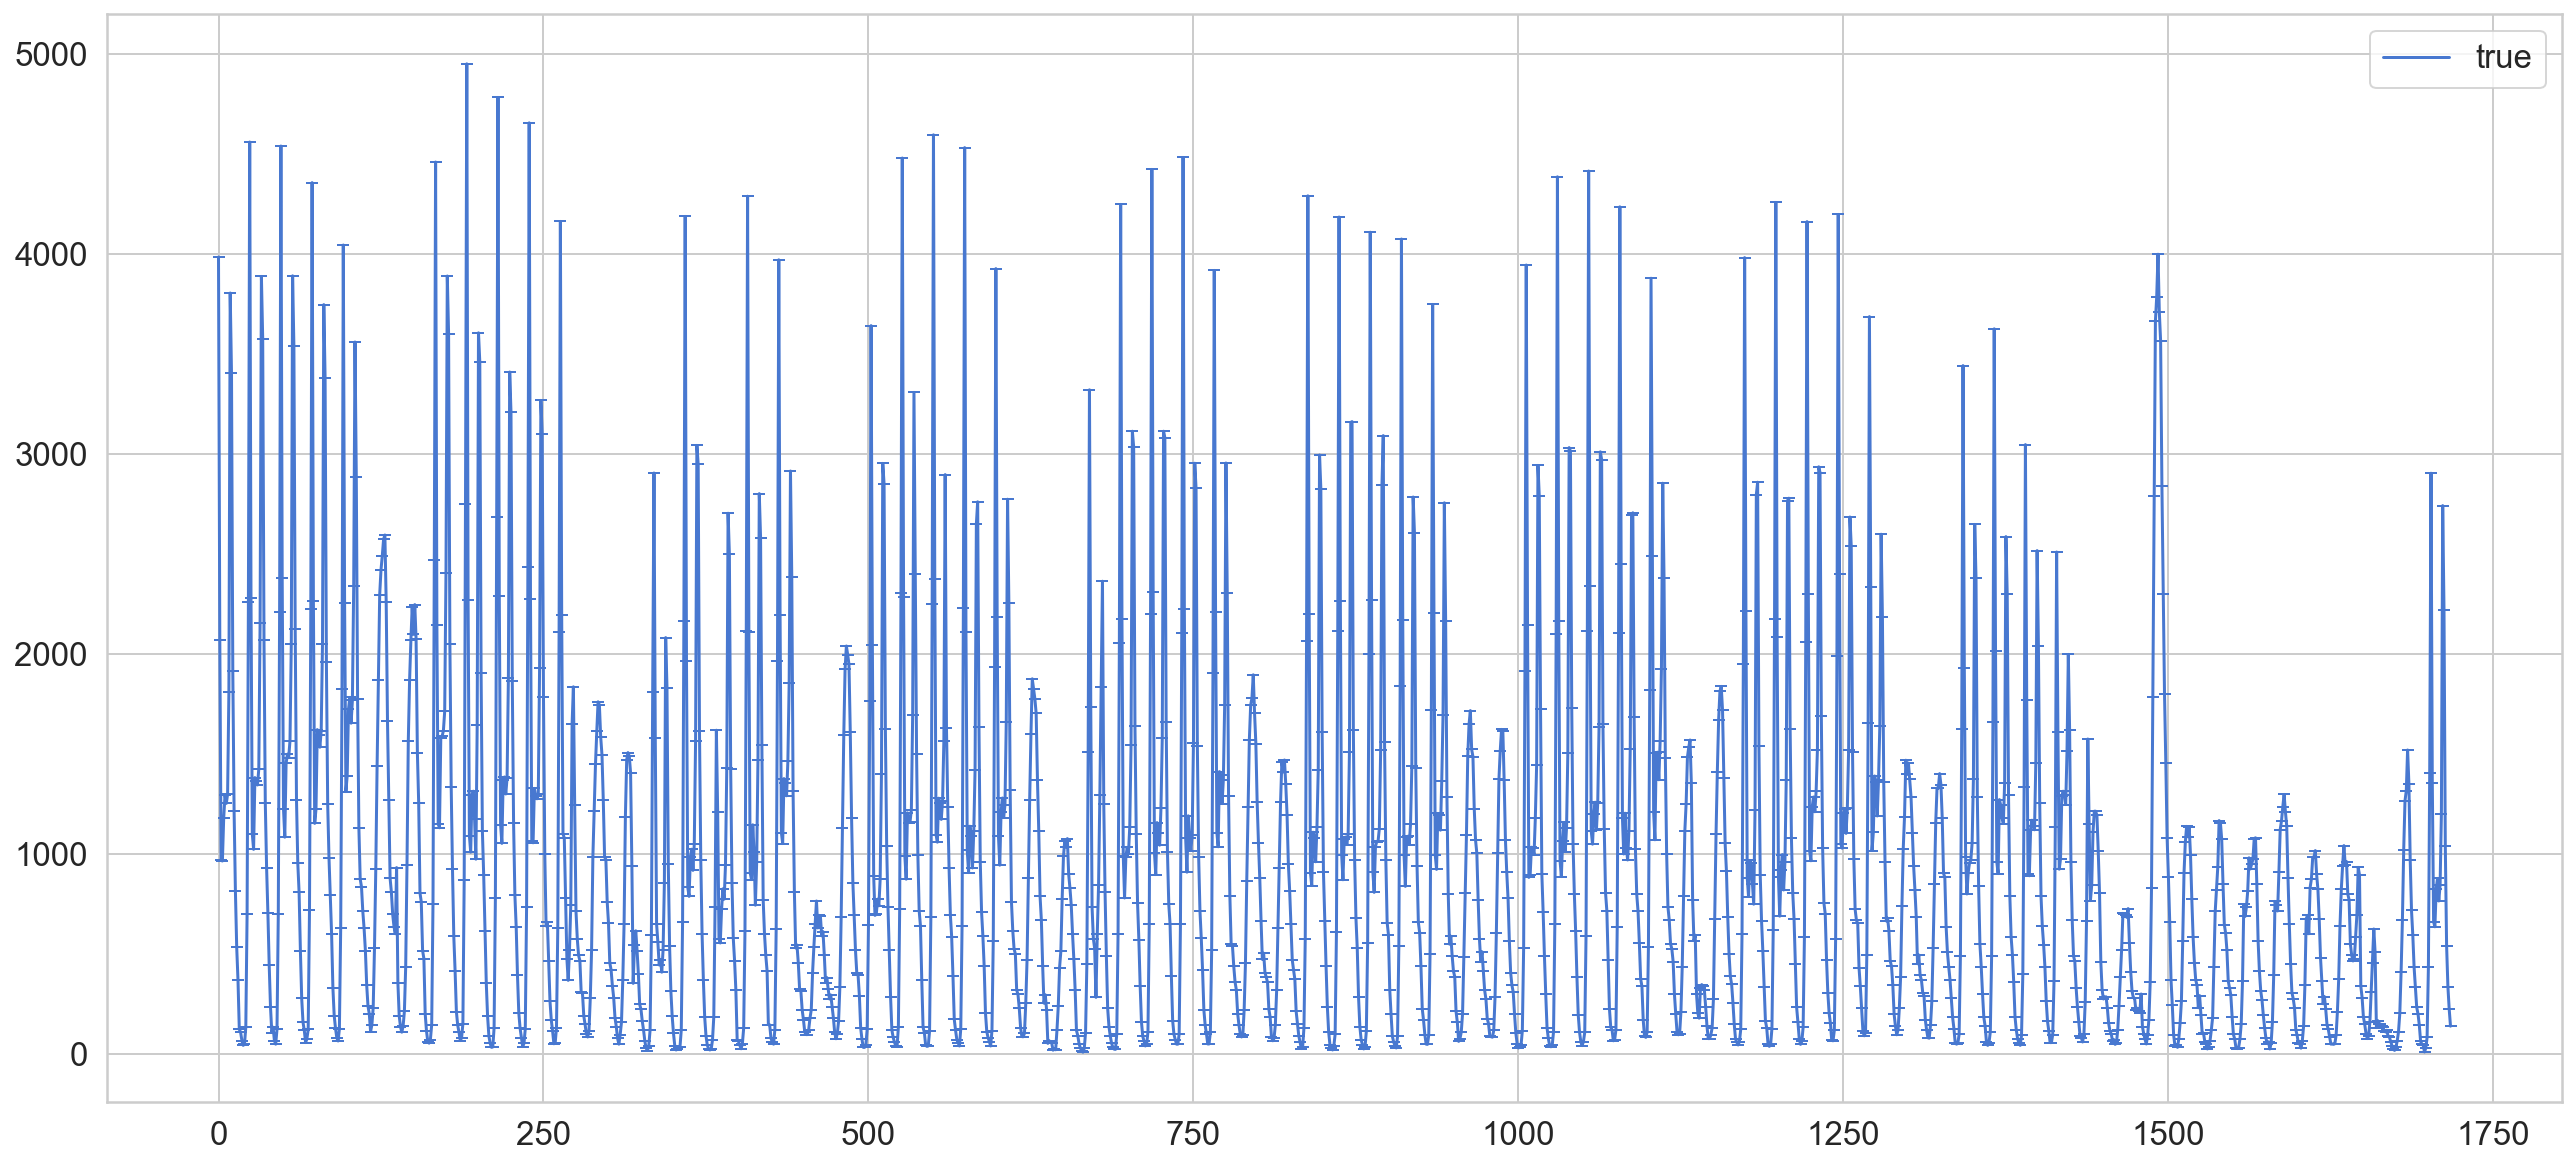

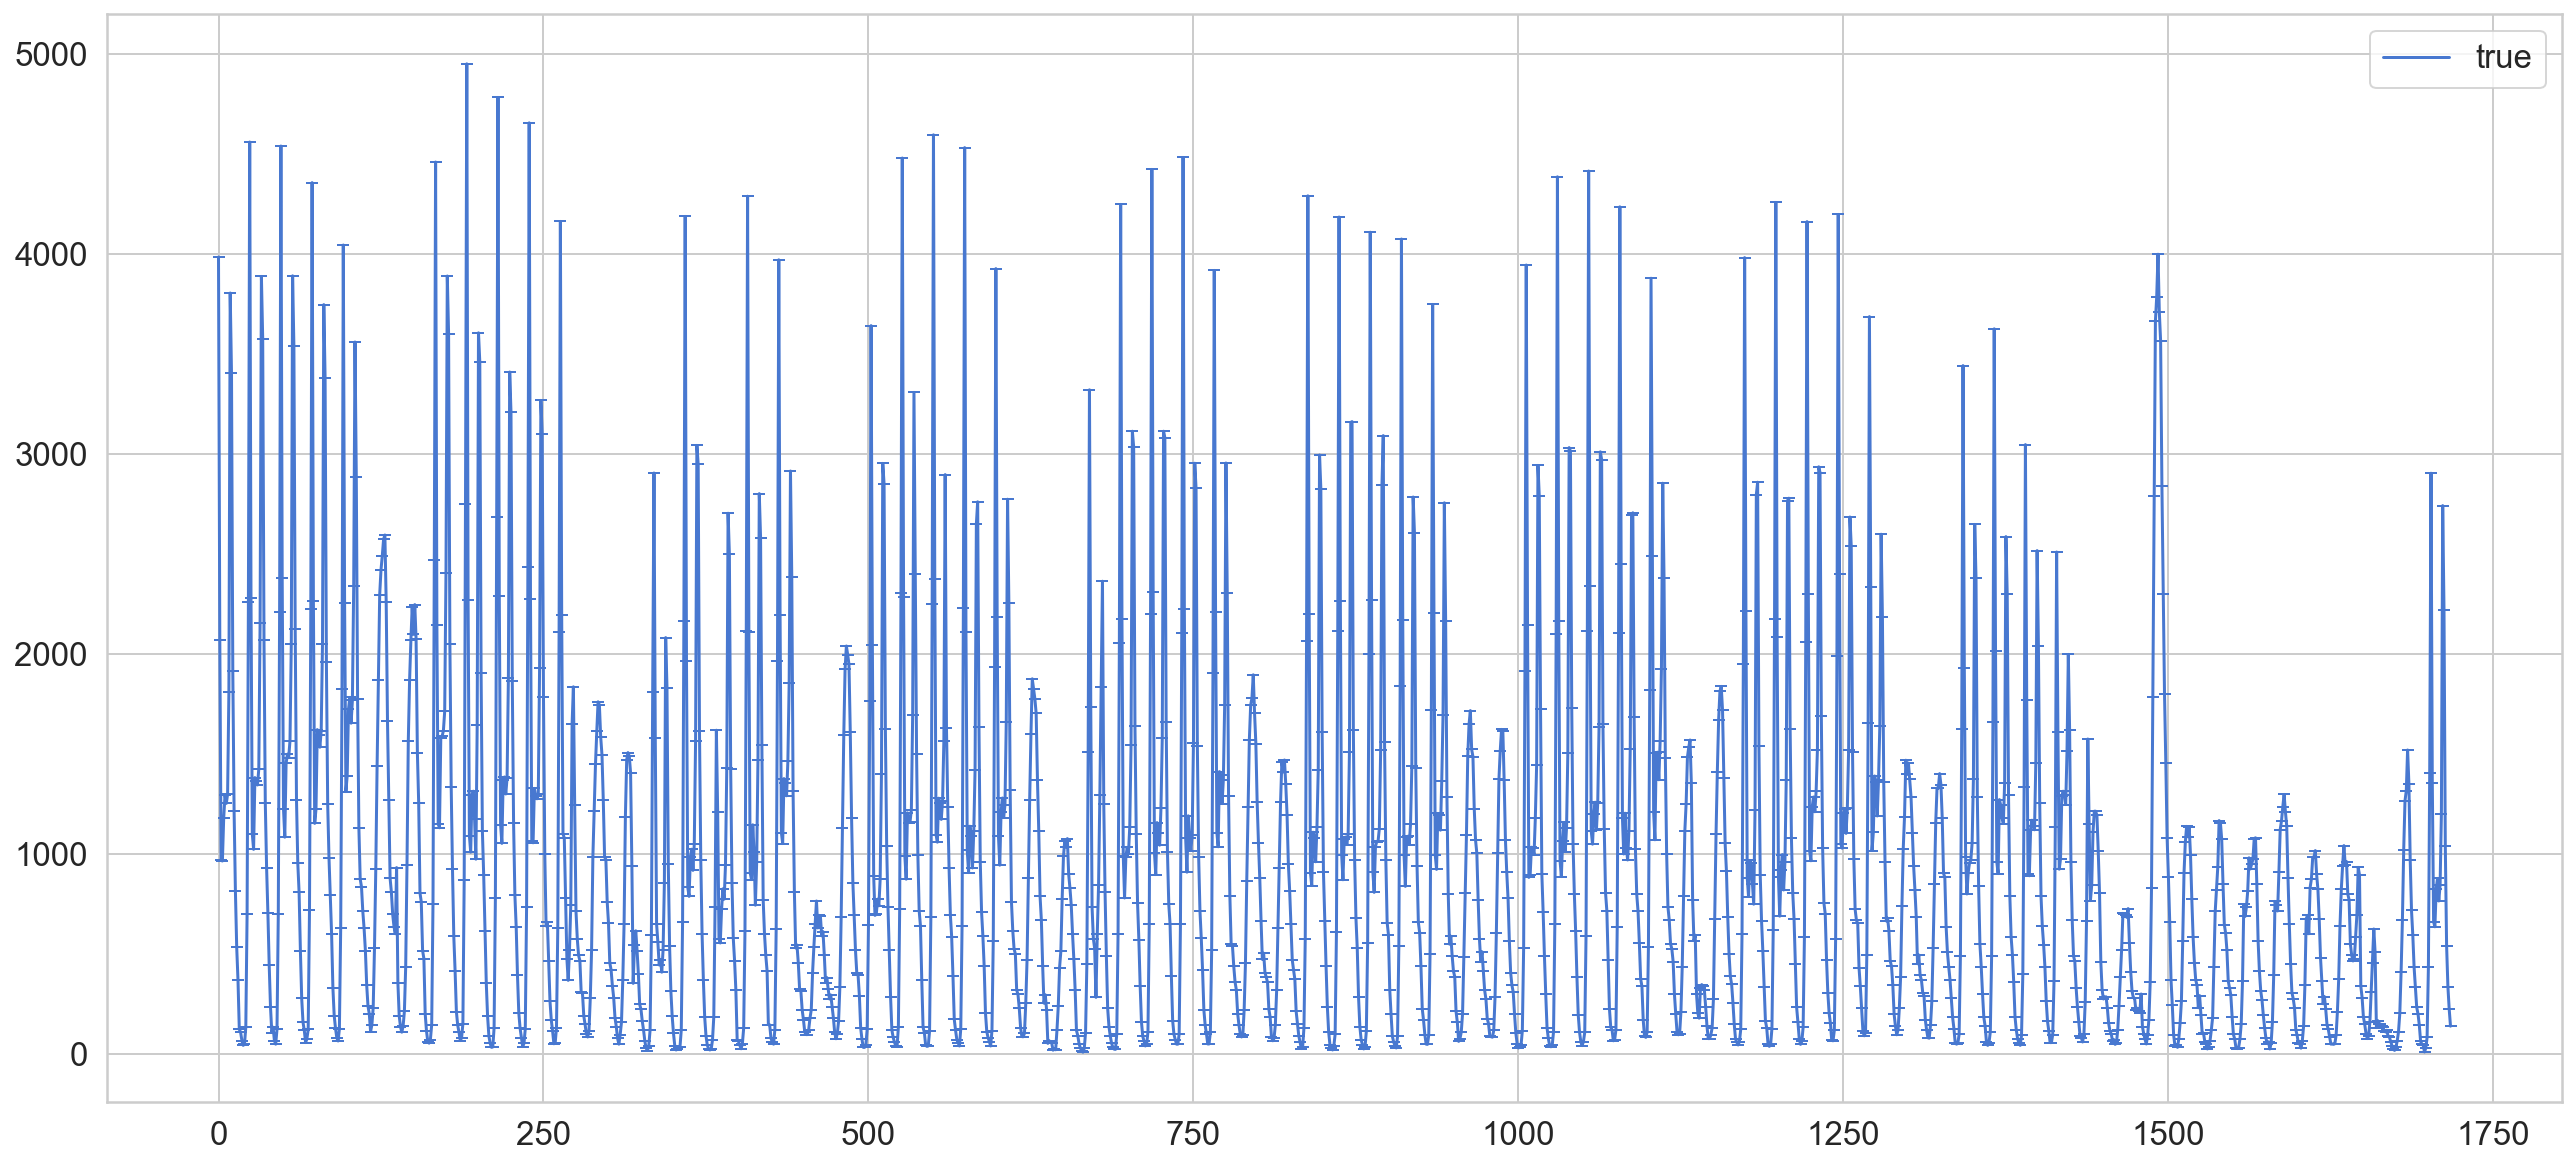

In [62]:
plt.plot(y_test_inv.flatten(),marker = '_',label = 'true')
plt.legend()


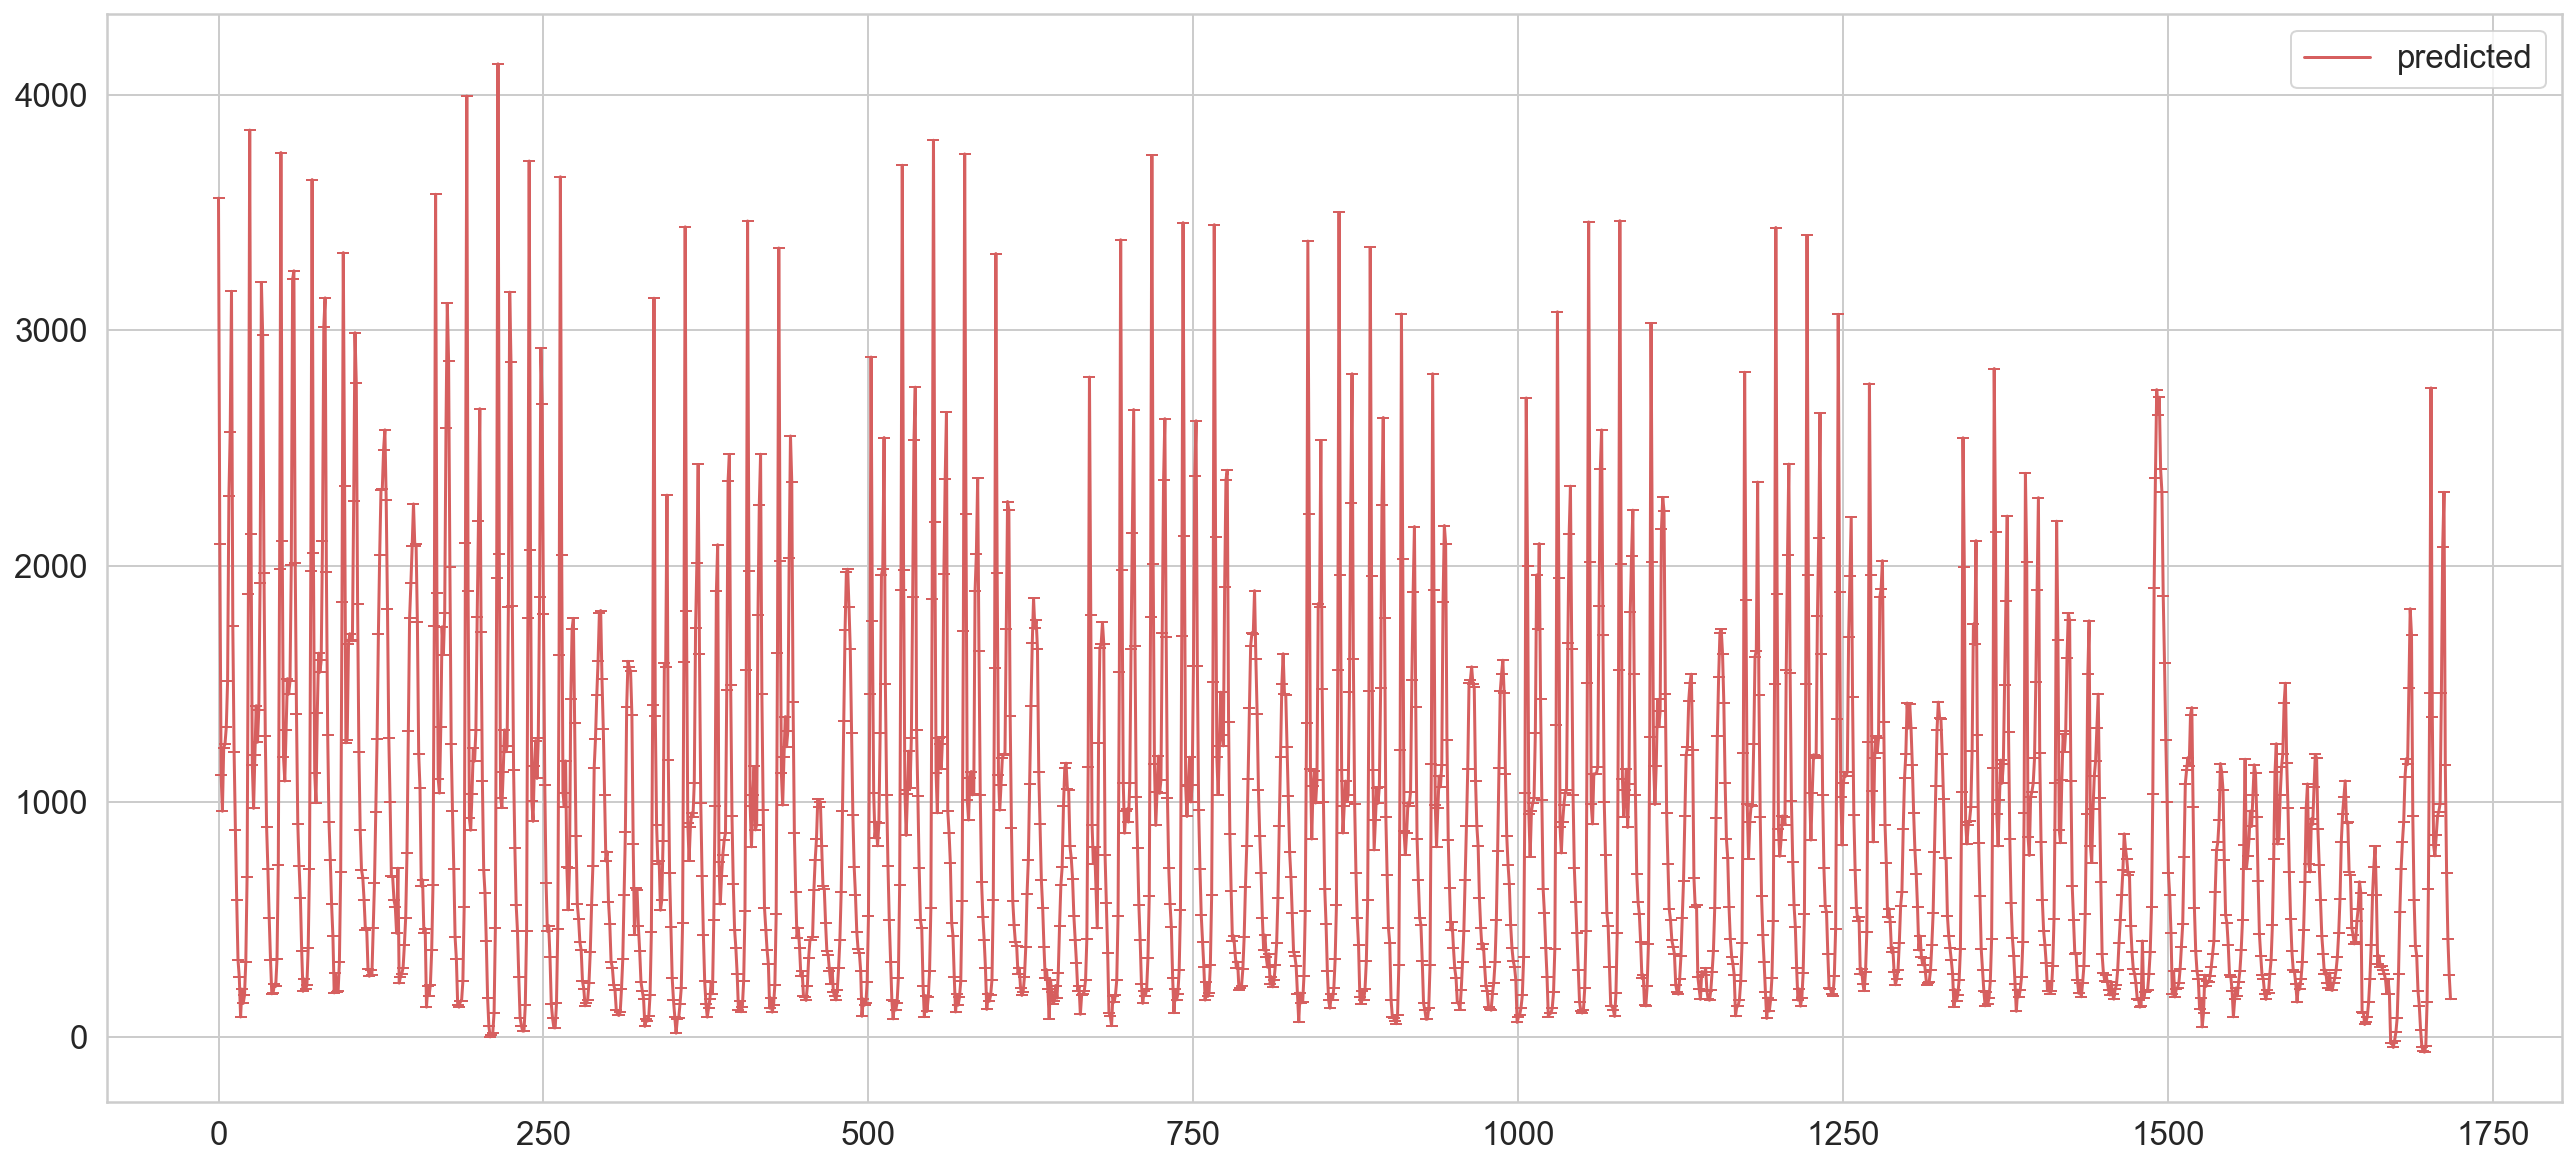

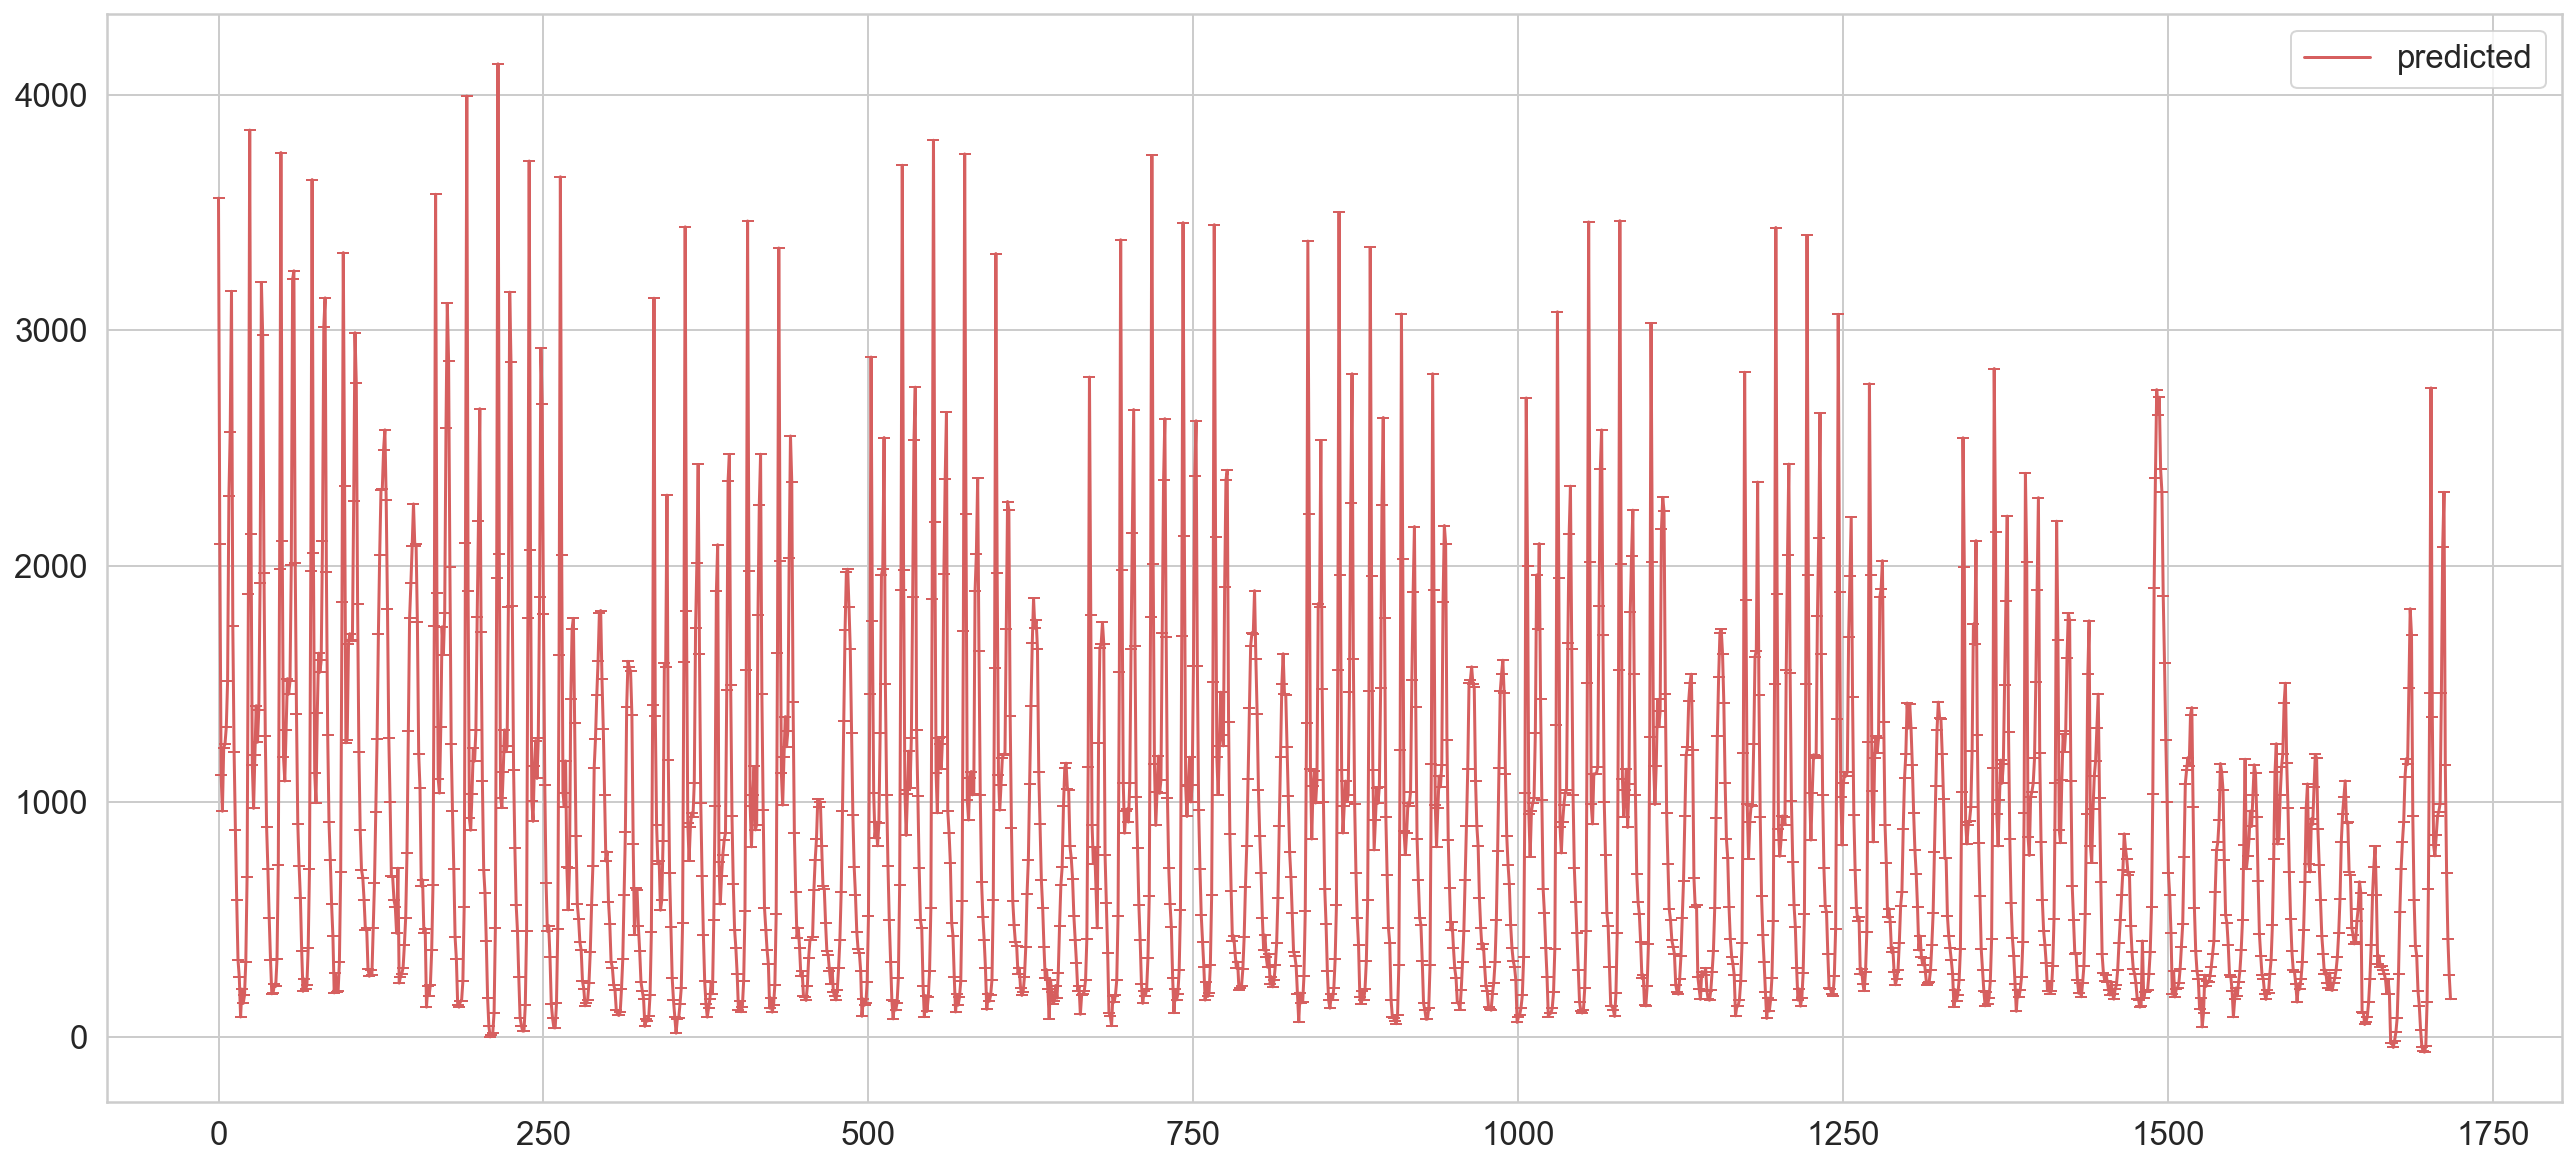

In [63]:
plt.plot(y_pred_inv.flatten(),'r',marker = '_',label = 'predicted')
plt.legend()